Conectando ao google drive para baixar o arquivo csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Bibliotecas
Abaixo estão todas as bibliotecas que foram utilizadas para fazer o trabalho.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer, Normalizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB


## Utilitários/Funções

O código abaixo foi uma tentativa de utilizar uma função chamada convertColumnStrToInt que converte os valores de uma coluna de um DataFrame do pandas de strings para inteiros, porém não deu certo, por isso foi deixada de lado.

In [ ]:
# Converte colunas para string
# df = Data Frame
# colName = Nome da coluna do panadas dataframe a ser convertida para valores inteiros
# newColname = Nome novo a ser salvo no pandas data frame como uma nova coluna
# Retorna = Data frame com o mapeamento da conversão Texto = Valor
def convertColumnStrToInt(df, colName, newColName = None):
  id = 0
  map = {}

  # Cria a estrutura inicial do pandas data frame com o mapa de resultados
  dfMap = pd.DataFrame([], columns=[colName, newColName])

  for i, row in df.iterrows():
    colVal = row[colName]
    if colVal not in map:
      id += 1
      map[colVal] = id
      dfMap.loc[len(dfMap)] = {colName: colVal, newColName: id}
    if newColName != None:
      df.loc[i, f"{newColName}"] = map[colVal]


  return dfMap

## Importação da base de dados

Abaixo estamos importando a base de dados csv e exibindo as 5 primeiras linhas.

In [ ]:
#Leitura do dataset para um DataFrame:

df = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding = "ISO-8859-1")
df.head(5)

<ipython-input-4-c8d6184bf149>:3: DtypeWarning: Columns (3,5,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding = "ISO-8859-1")


,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,...,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,...,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,...,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,...,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0


Utilizamos a função abaixo para que fossem exibidas todas as colunas do dataframe, que, por ser muito grande, estava ocutando algumas colunas.

In [ ]:
pd.set_option('display.max_columns', None)
print(df)

         Patient.Code              RCBP.Name     Gender Date.of.Birth   Age  \
0            672054.0  RCBP CAMPINAS-UNICAMP  MASCULINO    1975-03-16  30.0   
1            673213.0  RCBP CAMPINAS-UNICAMP   FEMININO    1950-05-24  53.0   
2            673396.0  RCBP CAMPINAS-UNICAMP   FEMININO    1951-09-02  51.0   
3            673425.0  RCBP CAMPINAS-UNICAMP   FEMININO    1929-11-21  73.0   
4            673745.0  RCBP CAMPINAS-UNICAMP  MASCULINO    1934-07-03  71.0   
...               ...                    ...        ...           ...   ...   
1778171           NaN           RCBP GOIÂNIA  MASCULINO           NaN  45.0   
1778172           NaN           RCBP GOIÂNIA  MASCULINO           NaN  61.0   
1778173           NaN           RCBP GOIÂNIA  MASCULINO           NaN  41.0   
1778174           NaN           RCBP GOIÂNIA  MASCULINO           NaN  82.0   
1778175           NaN           RCBP GOIÂNIA   FEMININO           NaN  51.0   

        Raca.Color Nationality Naturality.State Nat

Abaixo estamos imprimido os dados da descrição do tipo de câncer em crianças.

In [ ]:
df["Child.Illness.Description"].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Child.Illness.Description, dtype: object

## Normalização dos dados:

Notamos que os dados precisavam ser normalizado e começamos a normalizar utilizando condicional para classificar com números: 0 para masculino e 1 para feminino. Mesmo tendo formas de normalizar mais eficientes do que essa, como o Label Encoding que atribui um número inteiro único para cada valor único na coluna, mas não utilizamos essa função aqui ainda.

In [ ]:
# Conversao de genero
df['Gender codigo'] = df['Gender'].apply(lambda x: 0 if x == 'MASCULINO' else 1)
df.head(5)

,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year,Gender codigo
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0,0
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0,1
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0,1
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0,1
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0,0


Abaixo estamos normalizando as raças atribuindo números a cada uma também.

In [ ]:
# Conversão de raça ou cor
df['Raca.Color.Int'] = df['Raca.Color'].apply(
      lambda x:
      1 if x == 'AMARELA' else
      2 if x == 'BRANCO' else
      3 if x == 'INDÍGENA' else
      4 if x == "PARDA" else
      5 if x == "PRETA" else 0
    )
df.head(5)
# df.groupby(['Raca.Color']).mean()

,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year,Gender codigo,Raca.Color.Int
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0,0,2
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0,1,0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0,1,4
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0,1,0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0,0,2


Abaixo estamos normalizando definindo 1 para caso o paciente estiver vivo, 2 para caso estiver morto e 0 caso a coluna esteja com outra informação

In [ ]:
df['Status.Vital.Int'] = df['Status.Vital'].apply(
      lambda x:
      1 if x == 'VIVO' else
      2 if x == 'MORTO' else 0

    )
df.head(5)
#df.groupby(['Status.Vital']).mean()

,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year,Gender codigo,Raca.Color.Int,Status.Vital.Int
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0,0,2,2
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0,1,0,2
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0,1,4,2
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0,1,0,1
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0,0,2,2


Abaixo estamos normalizando para 1 caso o tipo de morte tenha sido por câncer, 2 caso não tenha sido e 0 para outra informação que apareça.

In [ ]:
df['Type.of.Death.Int'] = df['Type.of.Death'].apply(
      lambda x:
      1 if x == 'CÂNCER' else
      2 if x == 'NÃO CÂNCER' else 0
    )
df.head(5)


,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year,Gender codigo,Raca.Color.Int,Status.Vital.Int,Type.of.Death.Int
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0,0,2,2,1
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0,1,0,2,0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0,1,4,2,1
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0,1,0,1,0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0,0,2,2,1


Abaixo também foi uma tentativa de normalização atribuindo um número a cada estado.

In [ ]:
# Conversão da naturalidade
df['Naturality.State.Int'] = df['Naturality.State'].apply(
      lambda x:
      1 if x == 'ACRE' else
      2 if x == 'ALAGOAS' else
      3 if x == 'AMAPA' else
      4 if x == "AMAZONAS" else
      5 if x == "BAHIA" else
      6 if x == "CEARÁ" else
      7 if x == "DISTRITO FEDERAL" else
      8 if x == "ESPIRITO SANTO" else
      9 if x == "GOIAS" else
      10 if x == "MARANHÃO" else
      11 if x == "MATO GROSSO" else
      12 if x == "MATO GROSSO DO SUL" else
      13 if x == "MINAS GERAIS" else
      14 if x == "PARANÁ" else
      15 if x == "PARAÍBA" else
      16 if x == "PARÁ" else
      17 if x == "PERNAMBUCO" else
      18 if x == "PIAUÍ" else
      19 if x == "RIO DE JANEIRO" else
      20 if x == "RIO GRANDE DO NORTE" else
      21 if x == "RIO GRANDE DO SUL" else
      22 if x == "RONDONIA" else
      23 if x == "RORAIMA" else
      24 if x == "SANTA CATARINA" else
      25 if x == "SERGIPE" else
      26 if x == "SÃO PAULO" else
      27 if x == "TOCANTINS" else 0
    )
df.head(5)
# df.groupby(['Naturality.State']).mean()

,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year,Gender codigo,Raca.Color.Int,Status.Vital.Int,Type.of.Death.Int,Naturality.State.Int
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0,0,2,2,1,26
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0,1,0,2,0,0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0,1,4,2,1,26
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0,1,0,1,0,0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0,0,2,2,1,26


Abaixo estamos fazendo um filtro por colunas para saber a quantidade de pessoas que possui no df, quantas delas já foram classificadas como mortas e quantas dessas foram por câncer e quantas não foram.

In [ ]:
# Filtrar os dados apenas para os casos em que o Status.Vital é 'MORTO'
mortos = df[df['Status.Vital'] == 'MORTO']

# Filtrar os casos em que a causa da morte é 'CÂNCER'
mortos_por_cancer = mortos[mortos['Type.of.Death'] == 'CÂNCER']

# Calcular o número total de pessoas que morreram
total_mortos = mortos.shape[0]

# Calcular o número de pessoas que morreram por câncer
mortos_por_cancer = mortos_por_cancer.shape[0]

# Calcular o número de pessoas que não morreram por câncer
nao_mortos_por_cancer = total_mortos - mortos_por_cancer

# Calcular a quantidade total de pessoas
quantidade_total_pessoas = df.shape[0]

# Exibir os resultados
print(f"Quantidade total de pessoas: {quantidade_total_pessoas}")
print(f"Total de pessoas que morreram: {total_mortos}")
print(f"Pessoas que morreram por câncer: {mortos_por_cancer}")
print(f"Pessoas que não morreram por câncer: {nao_mortos_por_cancer}")

Quantidade total de pessoas: 1778176
Total de pessoas que morreram: 123862
Pessoas que morreram por câncer: 111620
Pessoas que não morreram por câncer: 12242


Por fim, estamos salvando esses dados normalizados em um df chamado df_normalizado.

In [ ]:
df_normalizado = df

## Análise gráfica dos dados:

Nesta parte começamos a plotar gráficos para tentar visualizar melhor as informações e ver quais algoritmos poderíamos utilizar que extraísse mais informações do dataframe.
Começamos com uma associação entre Idade e tipo de morte.

<Axes: xlabel='Type.of.Death.Int', ylabel='Age'>

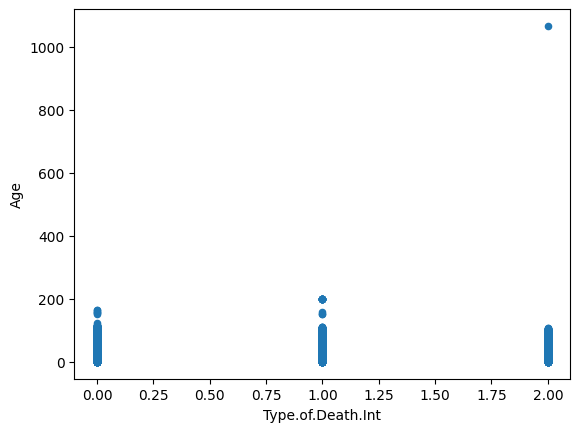

In [ ]:
df.plot(x="Type.of.Death.Int", y="Age", kind="scatter")

Depois fomos para tipo de morte por estado.

<Axes: xlabel='Type.of.Death.Int', ylabel='Naturality.State.Int'>

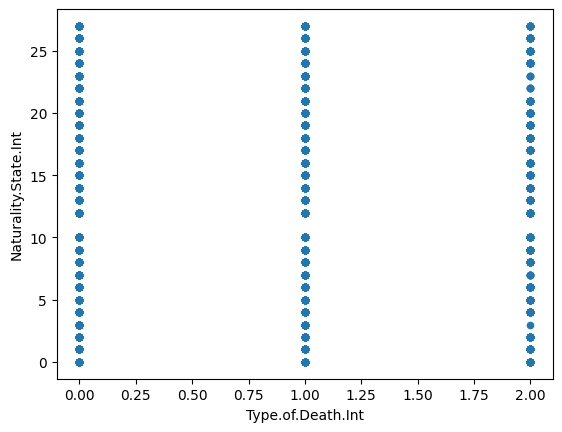

In [ ]:
df.plot(x="Type.of.Death.Int", y="Naturality.State.Int", kind="scatter")

Depois pensamos em normalizar a nacionalidade para tentar fazer uma associação entre tipo de morte por nacionalidade para identificar em quais países mais tem pessoas que morrem por câncer, mas por fim desistimos, pois como são dados de pessoas de outras nacionalidades que moram no Brasil, os dados não representariam uma informação real, por isso resolvemos deixar essa normalização de lado.

In [ ]:
df.groupby(['Nationality']).mean()

<ipython-input-16-fcb8c6513dfc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Nationality']).mean()


,Patient.Code,Age,Code.Profession,Code.of.Morphology,year,Gender codigo,Raca.Color.Int,Status.Vital.Int,Type.of.Death.Int,Naturality.State.Int
Nationality,,,,,,,,,,
AFEGANISTAO,8.793730e+05,60.000000,521.000000,80003.000000,2009.000000,0.000000,2.000000,2.000000,1.000000,0.000000
AFRICA DO SUL,1.111484e+06,60.000000,112.500000,83202.500000,2012.500000,0.500000,4.500000,0.000000,0.000000,0.000000
ALGERIA,9.995410e+05,70.000000,166.500000,80003.000000,2008.500000,0.000000,2.000000,1.000000,1.000000,0.000000
ANGOLA,9.424225e+05,54.000000,96.545455,82985.636364,2009.545455,0.636364,3.181818,0.545455,0.727273,0.000000
ANTIGUA,9.103280e+05,58.000000,411.000000,80003.000000,2008.000000,1.000000,4.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
TURQUIA,1.080422e+06,85.666667,84.000000,80469.666667,2011.333333,0.333333,2.000000,1.333333,1.000000,0.000000
UNIAO DAS REP. SOC. SOVIETICAS,5.427241e+05,77.228571,231.176471,84417.285714,2005.942857,0.542857,1.714286,0.542857,0.657143,0.000000
URUGUAI,8.043763e+05,66.935484,258.148148,82372.701613,2010.233871,0.435484,2.008065,0.467742,0.540323,0.314516


Abaixo tentamos utilizar o método value_counts para normalização e verificação posteior se essa normalização faria com que nossos gráficos fossem melhores (A função value_counts() é um método do pandas que retorna uma série contendo a contagem de valores únicos em uma coluna de um DataFrame. Quando chamada com o parâmetro normalize=True, a função value_counts() retorna as frequências relativas dos valores em vez das contagens absolutas.), mas após a aplicação, vimos que não surtiu o efeito desejado.

In [ ]:
df.value_counts(normalize=True)

Patient.Code  RCBP.Name          Gender     Date.of.Birth  Age   Raca.Color  Nationality  Naturality.State  Naturality  Degree.of.Education             State.Civil  Code.Profession  Name.Occupation                                                               Status.Address  City.Address  Description.of.Topography                       Topography.Code  Morphology.Description        Code.of.Morphology  Description.of.Disease          Illness.Code  Child.Illness.Description                          Child.Illness.Code  Youth.Adult.Illness.Description                                  Code.of.Disease.Adult.Young.  Indicator.of.Rare.Case  Diagnostic.means              Extension  Laterality     Statement  TNM     Status.Vital  Type.of.Death  Date.of.Death  Date.of.Last.Contact  Date.of.Diagnostic  Distant.metastasis  year    Gender codigo  Raca.Color.Int  Status.Vital.Int  Type.of.Death.Int  Naturality.State.Int
780361.0      RCBP DRS BARRETOS  FEMININO   1993-12-21     15.0  PARDA       BRAS

##Gráficos

Abaixo contamos a quantidade de mortos por câncer relacionado às idades para depois plotarmos gráficos sobre esses dados.

In [ ]:
deaths_cancer = df[df["Type.of.Death.Int"] == 1]

# Contar o número de mortes por faixa etária (Age)
deaths_by_age = deaths_cancer["Age"].value_counts()

# Imprimir o resultado
print(deaths_by_age)

70.0     9430
71.0     9418
69.0     9386
73.0     9349
68.0     9227
         ... 
110.0       2
111.0       2
157.0       1
152.0       1
153.0       1
Name: Age, Length: 116, dtype: int64


O código abaixo é para a plotagem dos dados acima.

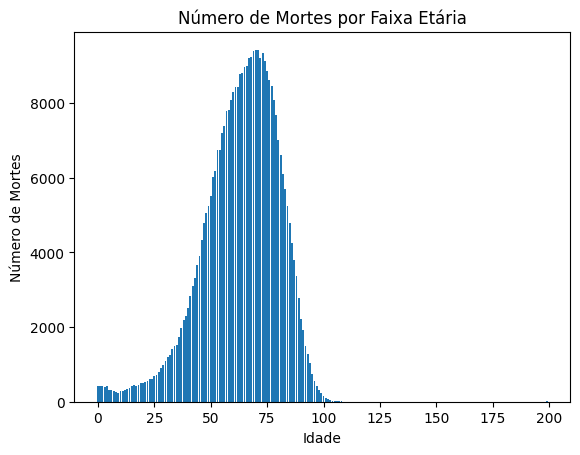

In [ ]:
import matplotlib.pyplot as plt

# Ordenar as idades em ordem crescente
deaths_by_age = deaths_by_age.sort_index()

# Plotar o gráfico de barras
plt.bar(deaths_by_age.index, deaths_by_age.values)

# Configurar o título e os rótulos dos eixos
plt.title("Número de Mortes por Faixa Etária")
plt.xlabel("Idade")
plt.ylabel("Número de Mortes")

# Mostrar o gráfico
plt.show()

Resolvemos plotar um gráfico de dispersão para ter uma outra visualização.

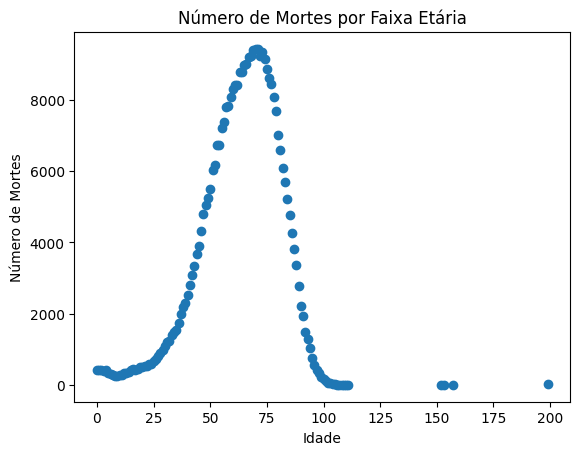

In [ ]:
# Ordenar as idades em ordem crescente
deaths_by_age = deaths_by_age.sort_index()

# Plotar o gráfico de dispersão
plt.scatter(deaths_by_age.index, deaths_by_age.values)

# Configurar o título e os rótulos dos eixos
plt.title("Número de Mortes por Faixa Etária")
plt.xlabel("Idade")
plt.ylabel("Número de Mortes")

# Mostrar o gráfico
plt.show()

Abaixo contamos a quantidade de mortos por raça, mas vimos que não era uma representação real dos dados, já que no dataframe há muito mais pessoas que se consideravam brancas do que as outras raças.

In [ ]:
# Contar o número de mortes por raça (Raca.Color)
deaths_by_race = deaths_cancer["Raca.Color"].value_counts()

# Imprimir o resultado
print(deaths_by_race)


BRANCO      181090
PARDA       129988
PRETA        21565
AMARELA       4208
INDÍGENA       597
Name: Raca.Color, dtype: int64


Mesmo assim, plotamos o gráfico para exibir os resultados.

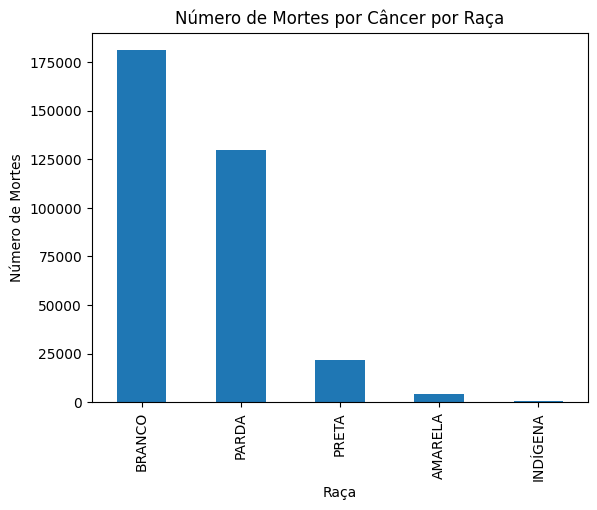

In [ ]:
# Plotar o gráfico de barras
deaths_by_race.plot(kind="bar")

# Configurar o título e os rótulos dos eixos
plt.title("Número de Mortes por Câncer por Raça")
plt.xlabel("Raça")
plt.ylabel("Número de Mortes")

# Mostrar o gráfico
plt.show()

Abaixo um gráfico de disperção dos mesmos dados.

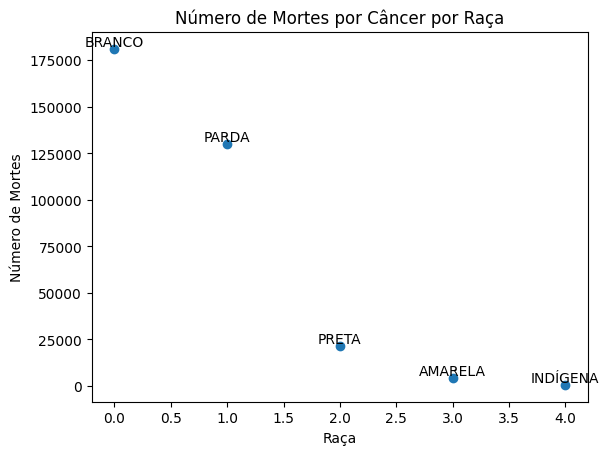

In [ ]:
# Configurar as coordenadas x e y para o gráfico de dispersão
x = range(len(deaths_by_race))
y = deaths_by_race.values

# Configurar as rótulos para o eixo x
labels = deaths_by_race.index

# Plotar o gráfico de dispersão
plt.scatter(x, y)

# Adicionar rótulos às bolinhas
for i in range(len(x)):
    plt.text(x[i], y[i], labels[i], ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title("Número de Mortes por Câncer por Raça")
plt.xlabel("Raça")
plt.ylabel("Número de Mortes")

# Mostrar o gráfico
plt.show()

Depois resolvemos contar a quantidades de mortes por câncer dividindo por estados.

In [ ]:
# Contar o número de mortes por câncer por estado de naturalidade
deaths_by_state = deaths_cancer["Naturality.State"].value_counts()

# Exibir o resultado
print(deaths_by_state)

MINAS GERAIS           24047
PARÁ                   18529
SÃO PAULO              18215
PARANÁ                 16303
RIO GRANDE DO SUL      14498
PERNAMBUCO             10412
AMAZONAS               10116
ESPIRITO SANTO          9637
CEARÁ                   9501
SANTA CATARINA          6058
MATO GROSSO             5802
ALAGOAS                 5106
BAHIA                   5101
PARAÍBA                 4020
PIAUÍ                   4009
SERGIPE                 3865
RIO DE JANEIRO          3077
MATO GROSSO DO SUL      2650
MARANHÃO                2532
GOIAS                   2193
RIO GRANDE DO NORTE      978
DISTRITO FEDERAL         943
ACRE                     942
RORAIMA                  559
TOCANTINS                553
RONDONIA                 325
AMAPA                    159
Name: Naturality.State, dtype: int64


Depois plotamos o gráfico dos dados encontrados.

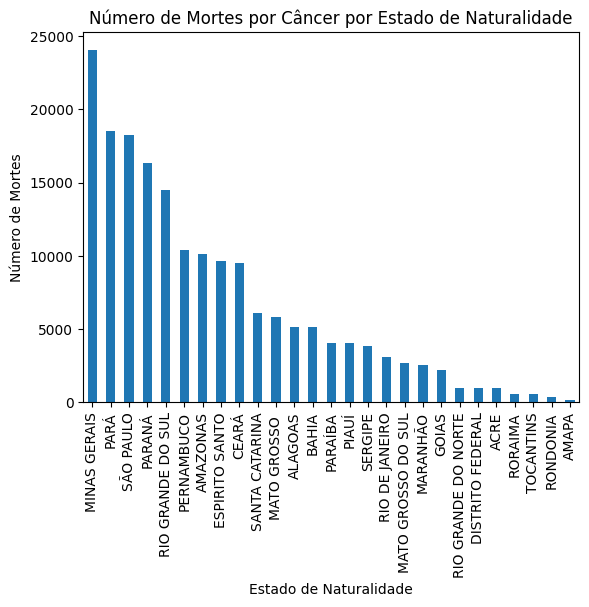

In [ ]:
# Plotar o gráfico de barras
deaths_by_state.plot(kind="bar")

# Configurar o título e os rótulos dos eixos
plt.title("Número de Mortes por Câncer por Estado de Naturalidade")
plt.xlabel("Estado de Naturalidade")
plt.ylabel("Número de Mortes")

# Mostrar o gráfico
plt.show()

Os mesmos dados abaixo, porém com um gráfico de dispersão

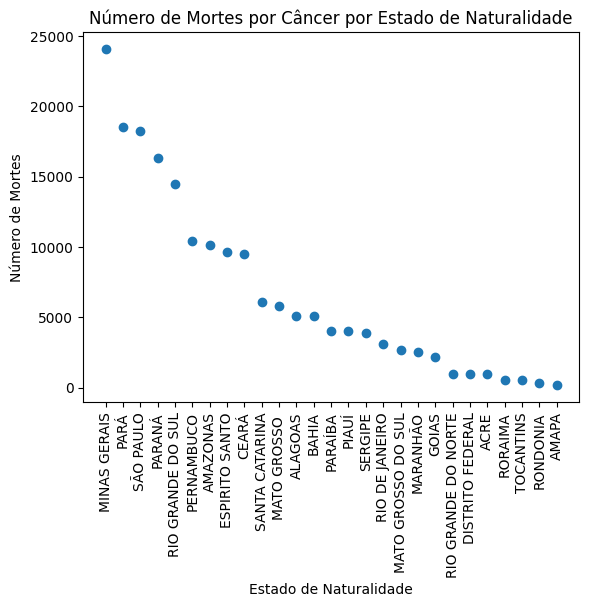

In [ ]:
# Criar as variáveis X e y para o gráfico de dispersão
X = deaths_by_state.index
y = deaths_by_state.values

# Plotar o gráfico de dispersão
plt.scatter(X, y)

# Configurar o título e os rótulos dos eixos
plt.title("Número de Mortes por Câncer por Estado de Naturalidade")
plt.xlabel("Estado de Naturalidade")
plt.ylabel("Número de Mortes")

# Rotacionar os rótulos do eixo x
plt.xticks(rotation='vertical')

# Mostrar o gráfico
plt.show()

Por fim plotamos um gráfico onde filtramos as pessoas que morreram por câncer, sendo que elas tiveram metástase e relacionamos à idade para identificar em qual idade a metástase é mais frequente e chegamos ao seguinte resultado:

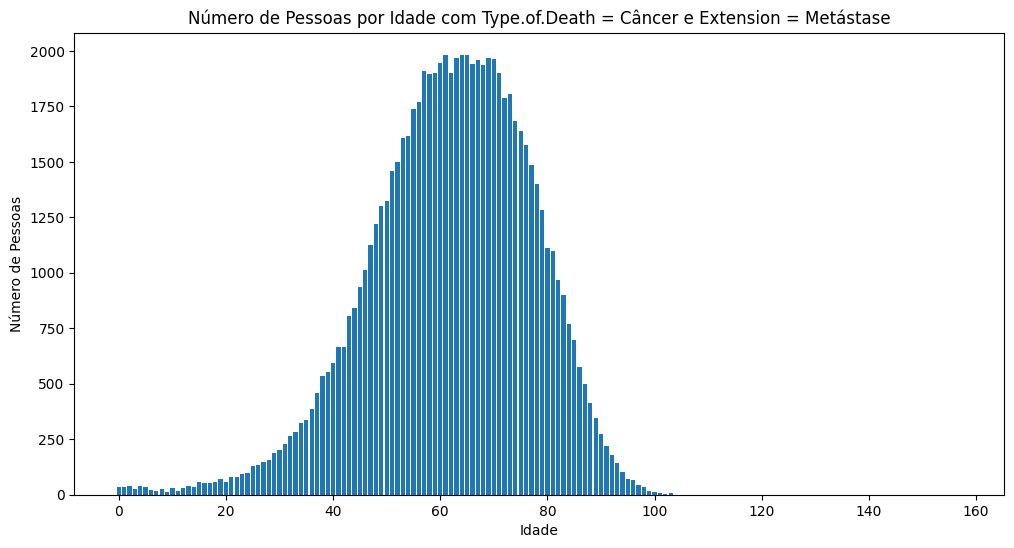

In [ ]:
# Filtrar os dados para as condições desejadas
filtered_data = df[(df['Type.of.Death'] == 'CÂNCER') & (df['Extension'] == 'METÁSTASE')]

# Contar o número de pessoas por idade
age_counts = filtered_data['Age'].value_counts().sort_index()

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
plt.bar(age_counts.index, age_counts.values)

# Configurar os rótulos dos eixos
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')

# Configurar o título do gráfico
plt.title('Número de Pessoas por Idade com Type.of.Death = Câncer e Extension = Metástase')

# Exibir o gráfico
plt.show()

##REGRESSÃO LINEAR

Abaixo foi feita uma análise estatística dos dados de mortes por câncer agrupadas por raça. Ela calcula a média da idade das pessoas que faleceram para cada raça. Em seguida, utilizamos os valores de mortes por raça e idade para tentar criar um modelo de regressão linear.

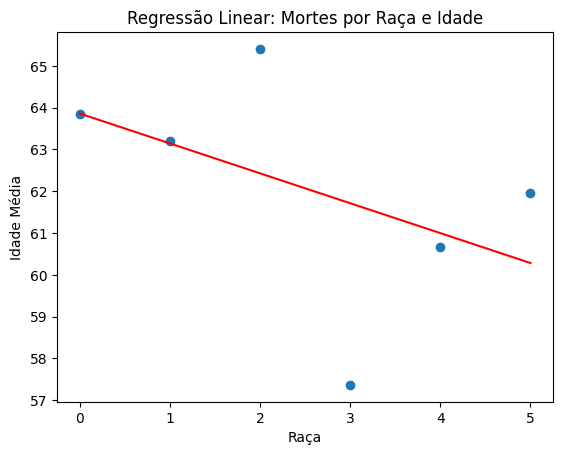

In [ ]:


# Agrupar o número de mortes por raça e calcular a média da idade
deaths_by_race = deaths_cancer.groupby("Raca.Color.Int")["Age"].mean()

# Converter os valores de mortes por raça e idade para arrays
X = deaths_by_race.index.values.reshape(-1, 1)
y = deaths_by_race.values.reshape(-1, 1)

# Criar o modelo de regressão linear
regression = LinearRegression()

# Treinar o modelo com os dados
regression.fit(X, y)

# Fazer as previsões usando o modelo
y_pred = regression.predict(X)

# Plotar o gráfico de dispersão dos dados e a linha de regressão
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

# Configurar o título e os rótulos dos eixos
plt.title("Regressão Linear: Mortes por Raça e Idade")
plt.xlabel("Raça")
plt.ylabel("Idade Média")

# Mostrar o gráfico
plt.show()

Depois fizemos uma regressão linear utilizando apenas as colunas relevantes do DataFrame original. Essa regressão tem como objetivo prever a variável dependente Status.Vital.Int com base nas variáveis independentes Age e Raca.Color.Int. Por fim, os resultados são exibidos na tela utilizando a função print(). Os coeficientes são exibidos como um array e representam o peso ou importância das variáveis independentes na regressão. O intercepto é um valor único que representa o ponto em que a linha de regressão intercepta o eixo y.

In [ ]:
# Filtrar apenas as colunas relevantes para a regressão
dados_relevantes = df[['Age', 'Raca.Color.Int', 'Status.Vital.Int']]

# Remover linhas com valores ausentes
dados_relevantes = dados_relevantes.dropna()

# Separar as variáveis independentes (X) e a variável dependente (y)
X = dados_relevantes[['Age', 'Raca.Color.Int']]
y = dados_relevantes['Status.Vital.Int']

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X, y)

# Obter os coeficientes e o intercepto da regressão
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Exibir os resultados
print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")



Coeficientes: [0.00290115 0.06221597]
Intercepto: -0.0770935285527369


Depois tentamos realizar outra regressão linear utilizando as colunas relevantes do DataFrame original que foram 'Age', 'Raca.Color.Int', 'Status.Vital.Int'. O objetivo é prever a variável dependente Status.Vital.Int com base nas variáveis independentes Age (idade) e Raca.Color.Int (raça), porém não gerou uma regressão.

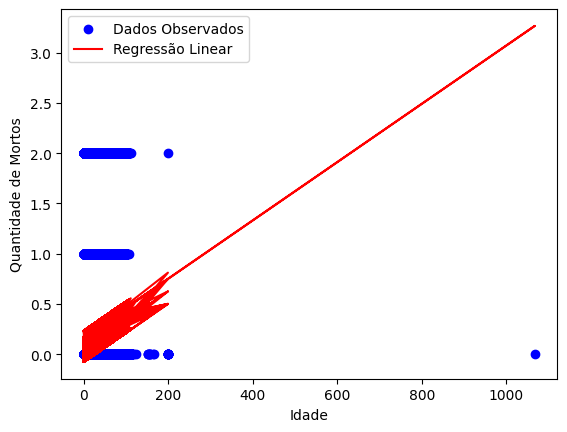

In [ ]:
# Filtrar apenas as colunas relevantes para a regressão
dados_relevantes = df[['Age', 'Raca.Color.Int', 'Status.Vital.Int']]

# Remover linhas com valores ausentes
dados_relevantes = dados_relevantes.dropna()

# Separar as variáveis independentes (X) e a variável dependente (y)
X = dados_relevantes[['Age', 'Raca.Color.Int']]
y = dados_relevantes['Status.Vital.Int']

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X, y)

# Prever os valores de y usando o modelo treinado
y_pred = modelo.predict(X)

# Plotar o gráfico de dispersão dos dados e a linha de regressão
plt.scatter(X['Age'], y, color='blue', label='Dados Observados')
plt.plot(X['Age'], y_pred, color='red', label='Regressão Linear')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Mortos')
plt.legend()
plt.show()


##KNN

Para começar o KNN iniciamos tentando visualizar a relação entre as variáveis "Age" e "Child Illness Code" (Código da doença infantil) por meio de um gráfico de dispersão.

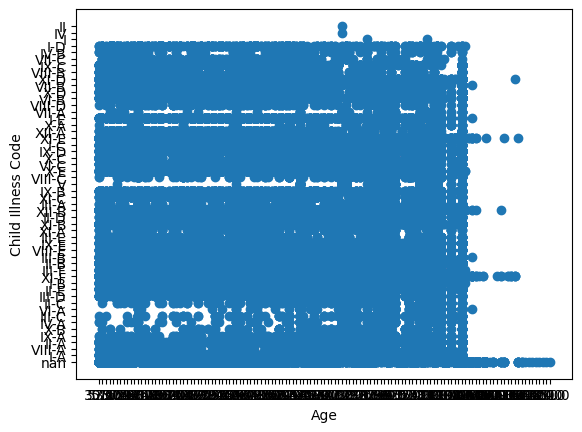

In [ ]:
# Converter as colunas para str
df["Age"] = df["Age"].astype(str)
df["Child.Illness.Code"] = df["Child.Illness.Code"].astype(str)

# Criar o gráfico de dispersão
plt.scatter(df["Age"], df["Child.Illness.Code"])

# Definir rótulos dos eixos x e y
plt.xlabel("Age")
plt.ylabel("Child Illness Code")

# Exibir o gráfico
plt.show()


Depois limitamos os banco de dados às primeiras 5000 linhas fizemos classificação de doenças infantis com base na idade usando o algoritmo k-NN. rodamos o código para remover as linhas com valores ausentes nas colunas "Age" e "Child.Illness.Code" do DataFrame, definimos as features (idade) e o target (código de doença infantil), realizamos imputação para preencher valores ausentes na idade, dividimos os dados em conjuntos de treino e teste, treina o modelo k-NN que faz previsões e calcula a acurácia do modelo.**negrito** O objetivo é avaliar a capacidade do modelo em classificar corretamente as doenças infantis com base na idade.

In [ ]:
#Limitando dados
df.head(5000)

# Remover linhas com valores ausentes na coluna "Age" e "Child.Illness.Code"
df_knn = df.dropna(subset=["Age", "Child.Illness.Code"])

# Definir as features (idade) e o target (raça)
X = df_knn[["Age"]]
y = df_knn["Child.Illness.Code"]

# Realizar imputação para preencher valores ausentes em X
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Criar o classificador k-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer as previsões
y_pred = knn.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

print("Acurácia: {:.2f}%".format(accuracy * 100))

Acurácia: 48.54%


Por fim imprimimos uma matriz de confusão como um heatmap para verificar os resultados.

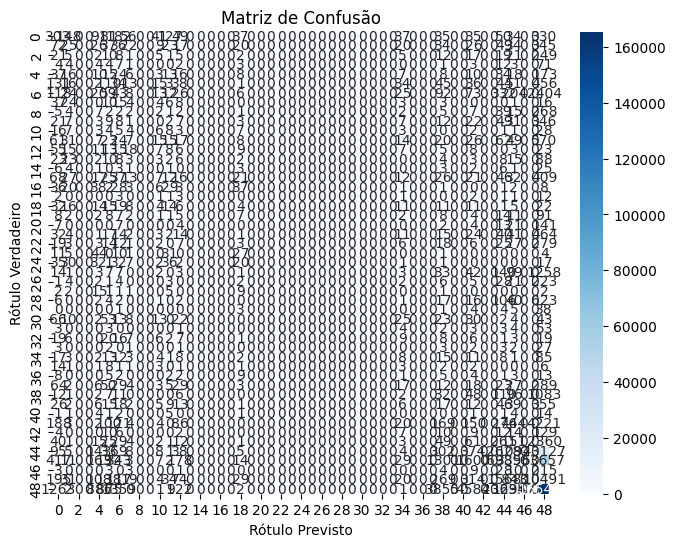

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()

Após ver o fracasso do código acima, resolvemos pegar uma amostra aleatória de 5000 mil dados

In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding = "ISO-8859-1")
df_original.head(5)

<ipython-input-34-43bef855090e>:1: DtypeWarning: Columns (3,5,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding = "ISO-8859-1")


,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0


In [ ]:
# Extrair uma amostra aleatória do DataFrame
df_amostra = df_original.sample(n=5000)  # Extrai 5000 linhas aleatórias

Excluímos as colunas desnecessárias e preenchemos os valores ausentes com o valor mais comum.

In [ ]:
#Removendo as colunas desnecessárias e preenchendo os valores ausentes:
df_knn = df_amostra.drop(['Date.of.Death', 'Date.of.Last.Contact', 'Date.of.Diagnostic','Patient.Code', 'RCBP.Name', 'Date.of.Birth', 'Naturality', 'State.Civil', 'Code.Profession', 'Name.Occupation', 'Status.Address', 'City.Address', 'Description.of.Topography', 'Topography.Code', 'Morphology.Description', 'Code.of.Morphology', 'Description.of.Disease', 'Illness.Code', 'Child.Illness.Description', 'Child.Illness.Code', 'Youth.Adult.Illness.Description', 'Code.of.Disease.Adult.Young.', 'Indicator.of.Rare.Case', 'Diagnostic.means', 'Extension', 'Laterality', 'Statement', 'TNM', 'Distant.metastasis', 'year'], axis=1)
df_knn.fillna(df_knn.mode().iloc[0], inplace=True)

Convertemos as variáveis categóricas em numéricas

In [ ]:
#Convertendo as variáveis categóricas em numéricas usando LabelEncoder:
label_encoder = LabelEncoder()
df_knn['Gender'] = label_encoder.fit_transform(df_knn['Gender'].astype(str))
df_knn['Raca.Color'] = label_encoder.fit_transform(df_knn['Raca.Color'].astype(str))
df_knn['Nationality'] = label_encoder.fit_transform(df_knn['Nationality'].astype(str))
df_knn['Naturality.State'] = label_encoder.fit_transform(df_knn['Naturality.State'].astype(str))
df_knn['Degree.of.Education'] = label_encoder.fit_transform(df_knn['Degree.of.Education'].astype(str))
df_knn['Status.Vital'] = label_encoder.fit_transform(df_knn['Status.Vital'].astype(str))
df_knn['Type.of.Death'] = label_encoder.fit_transform(df_knn['Type.of.Death'].astype(str))
df_knn.head(5)

,Gender,Age,Raca.Color,Nationality,Naturality.State,Degree.of.Education,Status.Vital,Type.of.Death
980805,0,75.0,1,1,12,0,0,0
955022,0,57.0,1,1,12,0,0,0
730995,1,74.0,3,1,12,1,0,0
1713512,1,48.0,4,1,16,0,0,0
734466,1,76.0,1,1,12,0,0,0


Depois fizemos novamente o knn, mas nesse caso tentamos prever o Status Vital, então, o código divide os dados em conjuntos de treinamento e teste usando a função train_test_split(). As variáveis independentes são armazenadas em X, excluindo a coluna 'Status.Vital', e a variável dependente é armazenada em y. O conjunto de teste é definido como 20% dos dados totais, e é fixado um valor de semente aleatória de 42 para garantir a reprodutibilidade dos resultados. Por fim exibimos a acurácia.

In [ ]:
#Dividindo os dados em conjuntos de treinamento e teste
X = df_knn.drop(['Status.Vital'], axis=1)  # Variáveis independentes
y = df_knn['Status.Vital']  # Variável dependente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando os dados usando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Criando uma instância do classificador KNN e treine o modelo
k = 5  # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#Fazendo previsões usando o conjunto de teste:
y_pred = knn.predict(X_test)

#Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.951


Depois calculamos a matriz de confusão utilizando a função confusion_matrix() do scikit-learn para checar se a predição estava funcionando.

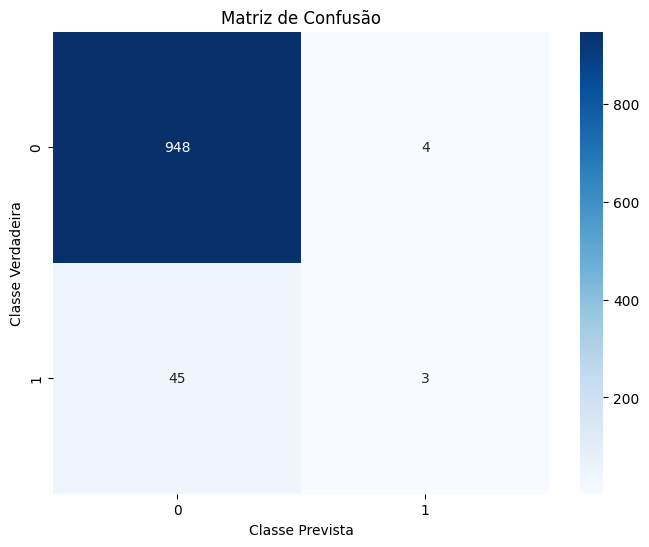

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

Por fim, aplicamos a curva ROC e a área sob a curva (ROC AUC) que são utilizadas para avaliar o desempenho de um classificador binário. Quanto mais próxima a curva ROC estiver do canto superior esquerdo e maior a área sob a curva, melhor é o desempenho do classificador.

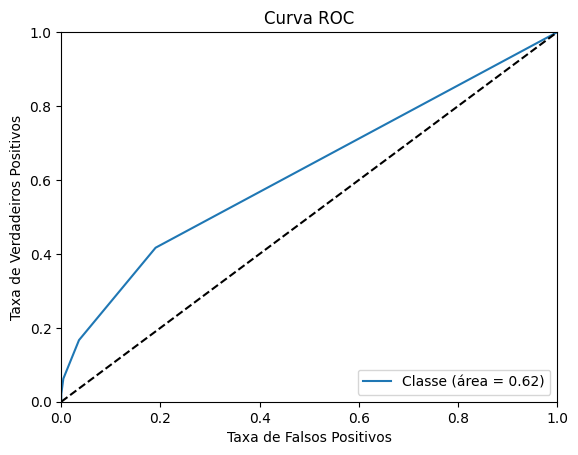

In [ ]:
# Calculando as probabilidades das classes
probas = knn.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calculando a curva ROC
fpr, tpr, _ = roc_curve(y_test, probas)
roc_auc = roc_auc_score(y_test, probas)

# Plotando a curva ROC
plt.plot(fpr, tpr, label='Classe (área = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência (classificador aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

##K-Means

Importamos novamente o banco de dados para que as alterações anteriores não interferissem nele na aplicação do K-means.

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding = "ISO-8859-1")
dados.head(5)

<ipython-input-41-98f5a8165055>:1: DtypeWarning: Columns (3,5,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding = "ISO-8859-1")


,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0


Abaixo a variável X contém os primeiros 500 registros do DataFrame dados. Em seguida, é utilizado o LabelEncoder da biblioteca scikit-learn para converter a coluna "Youth.Adult.Illness.Description" em valores numéricos. A linha le.fit_transform(X["Youth.Adult.Illness.Description"]) aplica a transformação nos dados da coluna, mapeando cada valor único para um valor numérico. A linha le.classes_ retorna os valores originais antes da transformação, ou seja, os rótulos correspondentes aos valores numéricos atribuídos a cada categoria da coluna "Youth.Adult.Illness.Description".

In [ ]:
X = dados.head(500)
le = LabelEncoder()
le.fit_transform(X["Youth.Adult.Illness.Description"])
le.classes_

array(['CARCINOMA DE TIREÓIDE', 'CARCINOMA DE ÚTERO E CÉRVIX',
       'LINFOMA DE HODGKIN', 'NEOPLASIAS INESPECÍFICAS',
       'NEOPLASIAS INTRACRANIANAS E INTRAESPINAIS NÃO-ESPECÍFICAS',
       'OSTEOSSARCOMA', nan], dtype=object)

O código realiza algumas etapas de pré-processamento de dados. Inicialmente, é criada a variável Y, que contém os valores da coluna "Youth.Adult.Illness.Description". Em seguida, são removidas colunas desnecessárias do DataFrame original, como informações pessoais e códigos identificadores. Essas colunas são descartadas para focar apenas nas variáveis relevantes para a análise.

Após essa etapa, são realizadas duas ações para garantir a qualidade dos dados. Primeiro, são removidas linhas duplicadas do DataFrame X, ou seja, aquelas que possuem exatamente os mesmos valores em todas as colunas. Isso evita a distorção dos resultados de análise devido a dados repetidos.

No final, o código exibe o cabeçalho do DataFrame X, apresentando uma amostra dos dados pré-processados para conferência. Essas etapas são comumente realizadas antes de realizar análises estatísticas ou treinamento de modelos de aprendizado de máquina, garantindo a consistência e integridade dos dados.

In [ ]:
# Colocar no vetor Y os valores referentes às classes
Y = dados["Youth.Adult.Illness.Description"]

# Remove as colunas desnecessárias
columns = ["Youth.Adult.Illness.Description", "Patient.Code", "RCBP.Name", "Degree.of.Education", "Code.Profession", "Name.Occupation", "Nationality", "Naturality.State", "State.Civil", "Naturality", "Topography.Code", "Code.of.Morphology", "Illness.Code", "Child.Illness.Description", "Child.Illness.Code", "Code.of.Disease.Adult.Young.", "Type.of.Death", "Date.of.Death", "Date.of.Last.Contact", "Date.of.Diagnostic", "year", "Laterality", "Status.Vital", "Distant.metastasis"]
X = dados.drop(columns, axis=1)

# X = X.dropna(axis=0)

# Remove dados duplicados
X.drop_duplicates(keep=False)
X.drop_duplicates(keep=False, inplace=True)

X.head()

,Gender,Date.of.Birth,Age,Raca.Color,Status.Address,City.Address,Description.of.Topography,Morphology.Description,Description.of.Disease,Indicator.of.Rare.Case,Diagnostic.means,Extension,Statement,TNM
0,MASCULINO,1975-03-16,30.0,BRANCO,SÃO PAULO,CAMPINAS,"RETO, SOE",NEOPLASIA MALIGNA,RETO,False,SDO,METÁSTASE,NaN,NaN
1,FEMININO,1950-05-24,53.0,NaN,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,ADENOCARCINOMA TUBULAR,COLON DESCENDENTE,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN
2,FEMININO,1951-09-02,51.0,PARDA,SÃO PAULO,CAMPINAS,"MAMA , SOE",CARCINOMA DUCTAL INFILTRANTE,"MAMA , SOE",False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN
3,FEMININO,1929-11-21,73.0,NaN,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",PELE DO MEMBRO SUPERIOR E DO OMBRO,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN
4,MASCULINO,1934-07-03,71.0,BRANCO,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",NEOPLASIA MALIGNA,LOCALIZACAO PRIMARIA DESCONHECIDA,False,SDO,NaN,NaN,NaN


Como já mostrado anteriormente, abaixo utiliza-se o LabelEncoder para converter strings em valores numéricos em várias colunas do DataFrame X.

In [ ]:
# Normaliza as strings para valores numéricos
le = LabelEncoder()
X["Gender"] = le.fit_transform(X["Gender"].astype('str'))
X["Date.of.Birth"] = le.fit_transform(X["Date.of.Birth"].astype('str'))
X["Raca.Color"] = le.fit_transform(X["Raca.Color"].astype('str'))
X["Status.Address"] = le.fit_transform(X["Status.Address"].astype('str'))
X["City.Address"] = le.fit_transform(X["City.Address"].astype('str'))
X["Description.of.Topography"] = le.fit_transform(X["Description.of.Topography"].astype('str'))
X["Morphology.Description"] = le.fit_transform(X["Morphology.Description"].astype('str'))
X["Indicator.of.Rare.Case"] = le.fit_transform(X["Indicator.of.Rare.Case"].astype('str'))
X["Diagnostic.means"] = le.fit_transform(X["Diagnostic.means"].astype('str'))
X["Extension"] = le.fit_transform(X["Extension"].astype('str'))
X["Statement"] = le.fit_transform(X["Statement"].astype('str'))
X["TNM"] = le.fit_transform(X["TNM"].astype('str'))
X["Description.of.Disease"] = le.fit_transform(X["Description.of.Disease"].astype('str'))

X = X.fillna(0)


X.head(100)

,Gender,Date.of.Birth,Age,Raca.Color,Status.Address,City.Address,Description.of.Topography,Morphology.Description,Description.of.Disease,Indicator.of.Rare.Case,Diagnostic.means,Extension,Statement,TNM
0,2,25243,30.0,1,23,66,318,598,453,0,6,2,170,1021
1,0,16181,53.0,5,23,66,47,58,59,0,3,4,170,1021
2,0,16647,51.0,3,23,66,205,162,276,0,3,4,170,1021
3,0,8692,73.0,5,23,66,291,133,414,0,3,4,170,1021
4,2,10377,71.0,1,23,66,200,598,269,0,6,4,170,1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,3204,86.0,1,23,66,382,600,509,0,6,4,170,1021
97,2,11523,64.0,1,23,66,271,600,390,0,6,4,170,1021
98,2,9991,69.0,1,23,66,200,600,269,0,6,2,170,1021
99,2,14245,56.0,3,23,66,271,600,390,0,6,4,170,1021


In [ ]:
X.head(5)

,Gender,Date.of.Birth,Age,Raca.Color,Status.Address,City.Address,Description.of.Topography,Morphology.Description,Description.of.Disease,Indicator.of.Rare.Case,Diagnostic.means,Extension,Statement,TNM
0,2,25243,30.0,1,23,66,318,598,453,0,6,2,170,1021
1,0,16181,53.0,5,23,66,47,58,59,0,3,4,170,1021
2,0,16647,51.0,3,23,66,205,162,276,0,3,4,170,1021
3,0,8692,73.0,5,23,66,291,133,414,0,3,4,170,1021
4,2,10377,71.0,1,23,66,200,598,269,0,6,4,170,1021


Abaixo código inicia fazendo a transformação dos dados em X utilizando o StandardScaler. Esse processo padroniza os dados, subtraindo a média e dividindo pelo desvio padrão, tornando-os com média zero e variância unitária. É uma etapa importante para preparar os dados antes de aplicar o PCA (Principal Component Analysis).

Em seguida, é criada uma instância do PCA com n_components=2, indicando que desejamos reduzir a dimensionalidade dos dados para duas dimensões. Essa escolha depende do objetivo e da quantidade de informações que se deseja reter após a redução de dimensionalidade.

A função fit_transform é utilizada para aplicar o PCA nos dados padronizados. Ela calcula os componentes principais e realiza a transformação dos dados originais para o novo espaço de características definido pelos componentes principais.

O resultado da transformação é armazenado na variável principalComponents, que contém as coordenadas dos dados no novo espaço de duas dimensões.

In [ ]:
#Para aplicar PCA, primeiro é preciso fazer a transformação dos dados
x = StandardScaler().fit_transform(X)
y = Y

#Aplicar PCA
pca = PCA(n_components=2) #escolhe a quantidade de componentes
principalComponents = pca.fit_transform(x) #aplica nos dados

Abaixo adiciona-se mais etapas para visualizar os dados transformados pelo PCA. Ele cria um DataFrame chamado principalDf com as duas componentes principais geradas pelo PCA. Em seguida, concatena esse DataFrame com a coluna "Youth.Adult.Illness.Description" dos dados originais, formando o DataFrame finalDf.

Em seguida, é criado um gráfico de dispersão (scatter plot) para visualizar os dados reais no espaço das duas componentes principais. O gráfico é configurado com rótulos para os eixos X e Y. A variável targets contém as classes alvo que serão plotadas com cores diferentes. As classes são "CARCINOMA DE TIREÓIDE" e "LINFOMA DE HODGKIN", representadas pelas cores vermelha (r) e verde (g), respectivamente.

Dentro do loop for, os pontos do gráfico são plotados para cada classe alvo. A variável indicesToKeep é utilizada para selecionar os pontos correspondentes à classe alvo atual. A função scatter é então usada para plotar esses pontos no gráfico, usando as coordenadas das componentes principais como coordenadas x e y, respectivamente. A cor e o tamanho dos pontos são configurados através dos argumentos c e s.

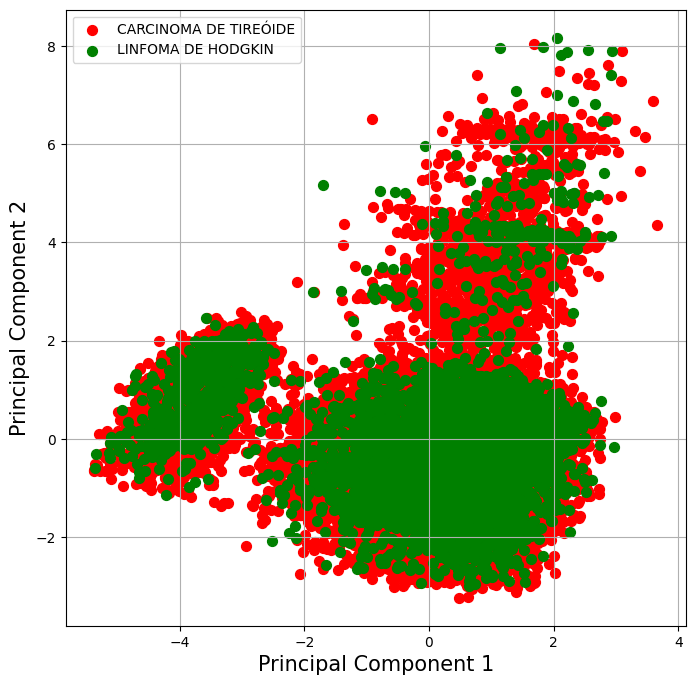

In [ ]:
pca = PCA(n_components=2) #escolhe a quantidade de componentes
principalComponents = pca.fit_transform(x) #aplica nos dados
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dados["Youth.Adult.Illness.Description"]], axis = 1)

#plotar os dados reais:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

# 'CARCINOMA DE TIREÓIDE', 'CARCINOMA DE ÚTERO E CÉRVIX',
# 'LINFOMA DE HODGKIN', 'NEOPLASIAS INESPECÍFICAS',
# 'NEOPLASIAS INTRACRANIANAS E INTRAESPINAIS NÃO-ESPECÍFICAS',
# 'OSTEOSSARCOMA'

targets = ['CARCINOMA DE TIREÓIDE', 'LINFOMA DE HODGKIN']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["Youth.Adult.Illness.Description"] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Após realiza uma análise do método "K-means" para diferentes valores de K, com o objetivo de confrontar o número de clusters (K) com a inércia. A inércia é uma medida de avaliação da qualidade do agrupamento, sendo a soma das distâncias quadráticas entre os pontos e seus centroides mais próximos.

O loop for itera de 1 a 10, onde cada valor de K é utilizado para criar uma instância do algoritmo K-means (KMeans) com o número correspondente de clusters. Em seguida, o algoritmo é ajustado aos dados das componentes principais (principalComponents) usando o método fit.

A inércia do modelo para cada valor de K é obtida através do atributo inertia_ do objeto algorithm. Esses valores são armazenados em uma lista chamada inertia.

No gráfico resultante, os valores de K (número de clusters) são plotados no eixo x e os valores de inércia são plotados no eixo y. Os pontos são marcados com 'o' e uma linha suave é traçada através deles com '-' e transparência de 0.5. O objetivo desse gráfico é analisar a curva de inércia em relação ao número de clusters e identificar o "cotovelo" na curva, que representa o número ideal de clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set t

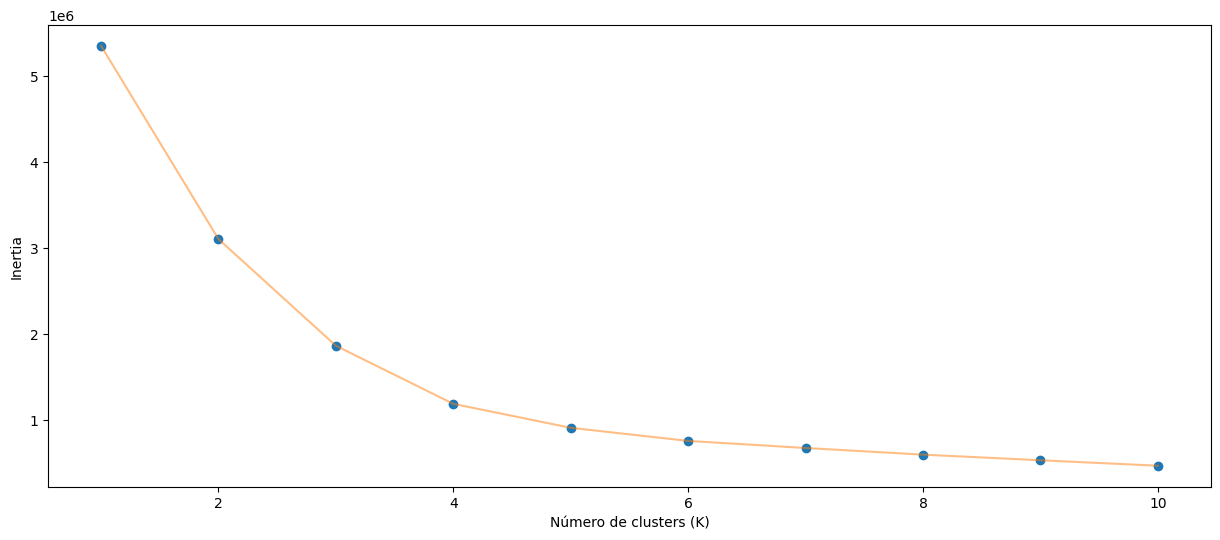

In [ ]:
#Confrontar K vs Inertia
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, random_state= 111  , algorithm='auto'))
    algorithm.fit(principalComponents)
    inertia.append(algorithm.inertia_) # inertia_ eh a distancia euclidiana ao centroide mais proximo, logo, sempre sera descrescente


plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de clusters (K)') , plt.ylabel('Inertia')
plt.show()

O código abaixo realiza a aplicação do algoritmo K-Means com K=5, ou seja, com a intenção de identificar 5 clusters nos dados representados pelas componentes principais.

Uma instância do algoritmo K-Means é criada com o número de clusters definido como 5 (n_clusters = 5). O parâmetro random_state é definido como 111 para garantir a reprodutibilidade dos resultados.

Em seguida, o algoritmo é ajustado aos dados das componentes principais (principalComponents) usando o método fit. Os rótulos dos clusters são obtidos através do atributo labels_ do objeto algorithm, e os centroides dos clusters são obtidos através do atributo cluster_centers_.

Esses rótulos e centroides podem ser utilizados para análises posteriores, como a visualização dos clusters ou a classificação de novos pontos em um cluster específico.

In [ ]:
#Aplicar K-Means com K=2

algorithm = (KMeans(n_clusters = 5, random_state= 111 ) )
algorithm.fit(principalComponents)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Após é plotado o gráfico para identificar como ficou a clusterização

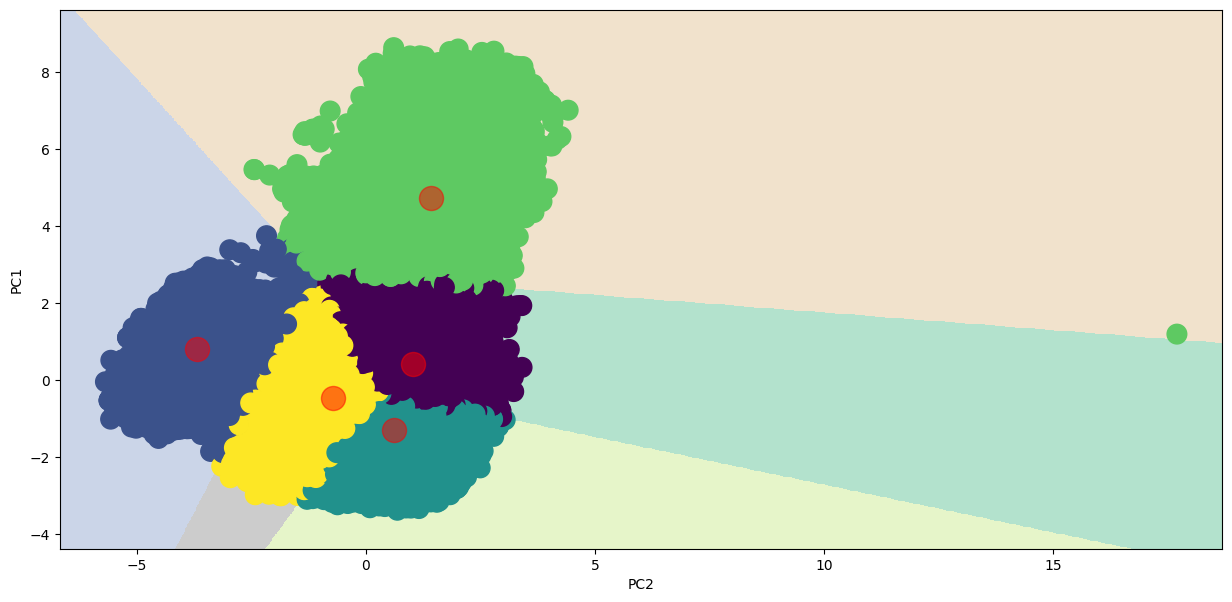

In [ ]:
#Mostrar como ficou depois de clusterizado com k=2:
h = 0.02
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'principal component 1' ,y = 'principal component 2' , data =principalDf, c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

Abaixo, os rótulos previstos pelo K-Means são convertidos em classes específicas ("CARCINOMA DE TIREÓIDE" ou "LINFOMA DE HODGKIN"). Em seguida, é calculada a porcentagem de acertos do modelo comparando os rótulos previstos com os rótulos esperados. A contagem de acertos é feita iterando sobre cada exemplo e verificando se a classe prevista coincide com a classe esperada. Por fim, é exibida a porcentagem de acerto como medida de desempenho do modelo

In [ ]:
labels_pred = np.where(labels1==1, 'CARCINOMA DE TIREÓIDE', 'LINFOMA DE HODGKIN') #transformar 1 e 0 em 'CARCINOMA DE TIREÓIDE', 'LINFOMA DE HODGKIN'
#transformar em listas:
predito = labels_pred.tolist()
esperado = Y.tolist()

#Calcular porcentagem
certos = 0
total_exemplos = len(predito)
for i in range(0, total_exemplos):
  if ( predito[i] == esperado[i]):
    certos = certos + 1
print(certos, "/" , total_exemplos)
acerto =  certos/len(predito)


print("Porcentagem de acerto = ", acerto)

7442 / 1157509
Porcentagem de acerto =  0.006429323659686448


Acima, com base nos resultados apresentados, observamos que o modelo obteve 7.44% de acertos (7442 acertos de um total de 1.157.509 exemplos). Essa porcentagem de acerto é relativamente baixa, apenas 0.64%. Isso indica que o modelo não está realizando previsões precisas e não é eficaz para classificar corretamente os exemplos.

É importante considerar que a taxa de acerto está diretamente relacionada à qualidade dos dados, ao algoritmo de aprendizado de máquina utilizado e à escolha adequada dos parâmetros. Nesse caso, pode ser necessário revisar e ajustar o modelo, explorar outras técnicas de aprendizado de máquina ou investigar se há algum problema nos dados de entrada. Além disso, é recomendável avaliar outras métricas de desempenho além da taxa de acerto, como precisão, recall e F1-score, para ter uma visão mais completa do desempenho do modelo.

##Regressão Logística

In [ ]:
#Limitando dados
df_logistica = df_normalizado.head(500)

O código realiza o pré-processamento dos dados, removendo linhas com valores ausentes e selecionando as colunas relevantes para o modelo. Em seguida, preenche os valores ausentes com a média dos atributos e converte a coluna 'Gender' de categórica para numérica. O DataFrame é filtrado para conter apenas classes binárias na coluna alvo. Os dados são divididos em conjuntos de treinamento e teste. Um modelo de Regressão Logística é treinado usando os dados de treinamento e usado para fazer previsões nos dados de teste. Por fim, a acurácia é calculada para avaliar o desempenho do modelo, representando a proporção de previsões corretas.

In [ ]:
# Pré-processamento dos dados
df_logistica = df_logistica.dropna(subset=['Gender', 'Age', 'Raca.Color.Int', 'Status.Vital.Int'])

# Selecionar as colunas relevantes para o modelo de Regressão Logística
selected_columns = ['Gender', 'Age', 'Raca.Color.Int', 'Status.Vital.Int']
df_selected = df_logistica[selected_columns]

# Preencher valores ausentes
df_selected = df_selected.fillna(df_selected.mean())

# Converter as colunas categóricas em numéricas usando LabelEncoder
label_encoder = LabelEncoder()
df_selected['Gender'] = label_encoder.fit_transform(df_selected['Gender'])

# Filtrar o DataFrame para ter apenas classes binárias (0 ou 1)
df_selected = df_selected[(df_selected['Status.Vital.Int'] == 0) | (df_selected['Status.Vital.Int'] == 1)]

# Separar os dados em features (X) e target (y)
X = df_selected.drop('Status.Vital.Int', axis=1)
y = df_selected['Status.Vital.Int']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.56


<ipython-input-53-f2ea143aad8f>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_selected = df_selected.fillna(df_selected.mean())


O código abaixo calcula a matriz de confusão a partir das previsões feitas pelo modelo de Regressão Logística. Em seguida, é plotada a matriz de confusão em um gráfico utilizando uma escala de cores. As classes são representadas no eixo x e y, e os valores da matriz são exibidos nas respectivas posições.

Além disso, o código também calcula a curva ROC (Receiver Operating Characteristic) e a área sob a curva (AUC). A curva ROC é plotada em um gráfico, onde a taxa de falsos positivos é representada no eixo x e a taxa de verdadeiros positivos no eixo y. A linha pontilhada representa a curva esperada para um classificador aleatório. A área sob a curva (AUC) é calculada e exibida no gráfico.

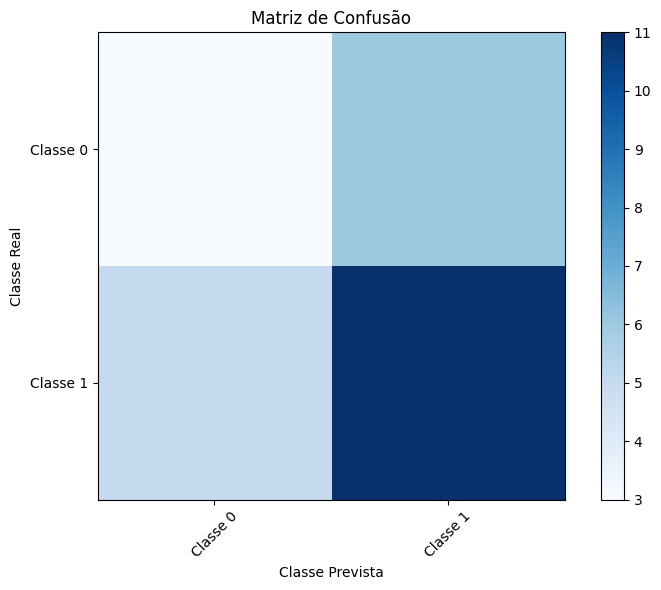

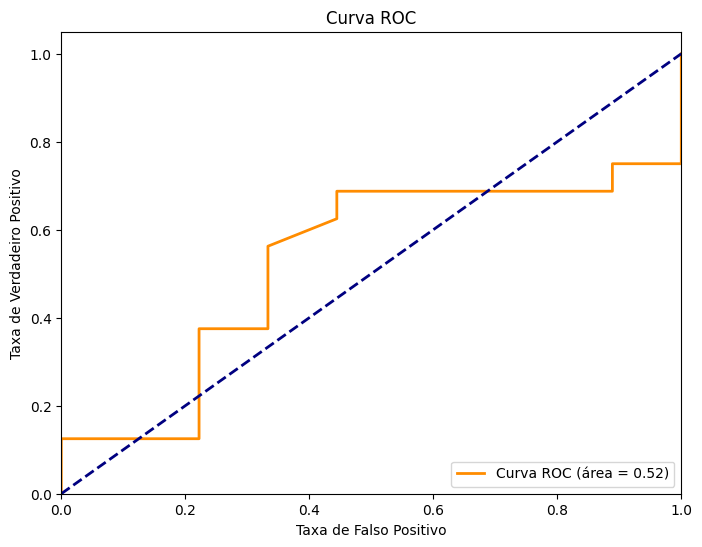

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = ['Classe 0', 'Classe 1']  # Substitua com as suas classes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.tight_layout()

# Plotar a curva ROC
probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Como visto acima o modelo não ficou preciso, pois a acurácia de 56% está quase que toda no falso positivo.

##Árvore de Decisão

In [ ]:
df_arvore = X.head(500)

O código realiza as seguintes etapas:

Converte a coluna 'Gender' do DataFrame 'df_arvore' em códigos numéricos usando o LabelEncoder.

Separa os dados de entrada (X) e a variável alvo (y) do DataFrame.

Divide os dados em um conjunto de treinamento e um conjunto de teste.

Cria e treina um modelo de árvore de decisão.

Faz previsões no conjunto de teste usando o modelo treinado.

Calcula a acurácia do modelo.

Imprime a estrutura da árvore de decisão.

O objetivo principal é utilizar a árvore de decisão para prever o gênero com base em outras variáveis presentes no conjunto de dados. A acurácia do modelo é calculada para avaliar a qualidade das previsões. A estrutura da árvore de decisão é impressa para fornecer uma representação visual das decisões tomadas pelo modelo.

In [ ]:
# Converter a coluna 'Gender' para códigos numéricos
le = LabelEncoder()
df_arvore['Gender'] = le.fit_transform(df_arvore['Gender'])

# Separar os dados de entrada (X) e a variável alvo (y)
X = df_arvore.drop(['Gender'], axis=1)
y = df_arvore['Gender']

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia: {:.2f}%'.format(accuracy * 100))

# Imprimir a estrutura da árvore de decisão
model.tree_

Acurácia: 64.00%


O objetivo é fornecer uma visualização clara e interpretável da árvore de decisão, mostrando as variáveis de entrada (features) e as decisões tomadas em cada nó. A coloração dos nós ajuda a identificar a classe predominante em cada ramo da árvore. Isso permite uma compreensão mais intuitiva do funcionamento do modelo de árvore de decisão. A cor mais escura indica a classe predominante, enquanto a cor mais clara indica uma classe menos predominante.

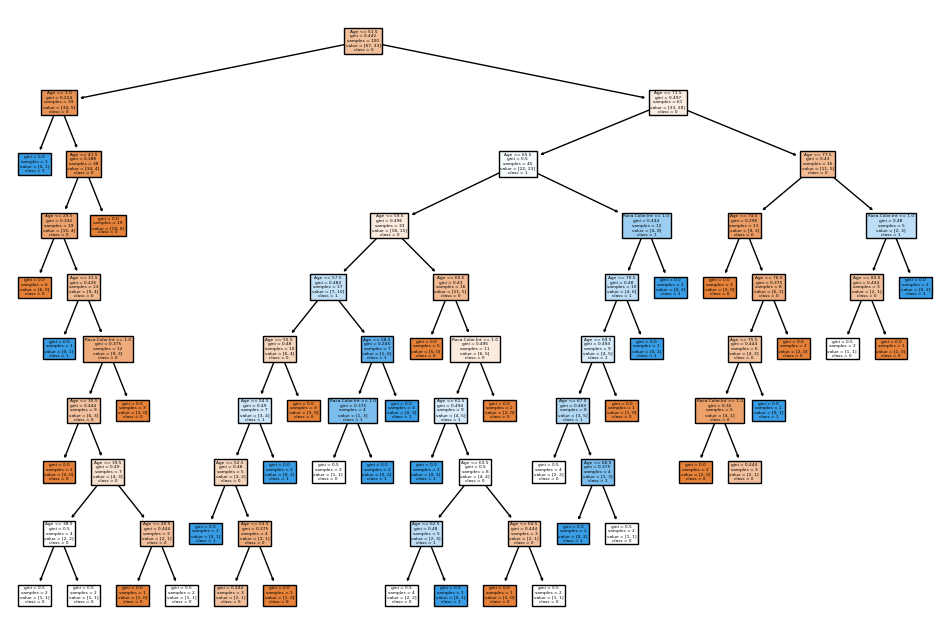

In [ ]:
# Converter as classes de volta para string
class_names = [str(cls) for cls in le.classes_]

# Plotar a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

##Naive Bayes

No código abaixo após pré-processar os dados, selecionar as colunas relevantes e preencher os valores ausentes, o modelo de Naive Bayes é treinado e avaliado com base no conjunto de teste. A acurácia resultante é impressa na saída.

O código está tentando prever a variável "Status.Vital.Int", que representa o status vital de um indivíduo. Essa variável pode ter dois valores: 0 (representando sobrevivência) ou 1 (representando óbito). O modelo de Naive Bayes é treinado com base em outras características do conjunto de dados, como gênero, idade e cor/raça, para fazer previsões sobre o status vital de um indivíduo com base nessas características.

In [ ]:


df_d = df_normalizado.head(500)
# Pré-processamento dos dados
df_d = df_d.dropna(subset=['Gender codigo', 'Age', 'Raca.Color.Int', 'Status.Vital.Int'])

# Selecionar as colunas relevantes para o modelo de Naive Bayes
selected_columns = ['Gender codigo', 'Age', 'Raca.Color.Int', 'Status.Vital.Int']
df_selected = df_d[selected_columns]

# Preencher valores ausentes
df_selected = df_selected.fillna(df_selected.mean())

# Converter as colunas categóricas em numéricas usando LabelEncoder
label_encoder = LabelEncoder()
df_selected['Gender codigo'] = label_encoder.fit_transform(df_selected['Gender codigo'])

# Separar os dados em features (X) e target (y)
X = df_selected.drop('Status.Vital.Int', axis=1)
y = df_selected['Status.Vital.Int']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.71


<ipython-input-58-27dbc2af48df>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_selected = df_selected.fillna(df_selected.mean())


Após é plotado o gráfico com a matriz de confusão, mas por ser multiclasse a matriz não foi plotada como o esperado gerando dificuldade na análise.

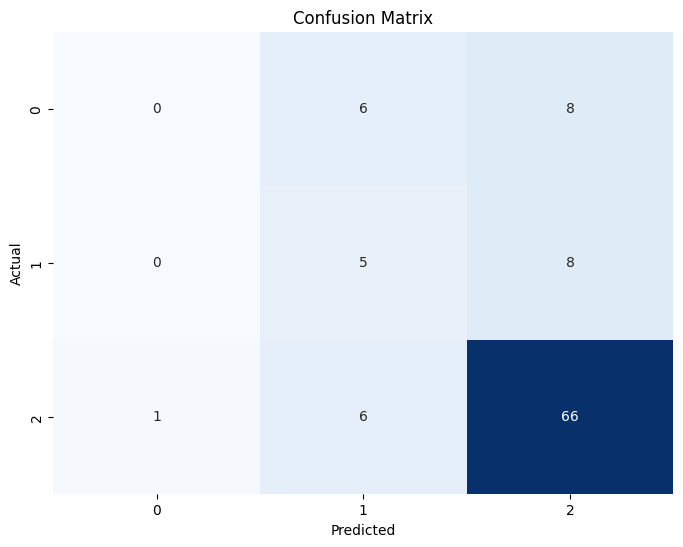

In [ ]:
# Calcular a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Obter rótulos das classes
class_labels = np.unique(np.concatenate((y_train, y_test)))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Rede Neural

A linha de código pd.options.display.max_columns = 500 define o limite máximo de colunas a serem exibidas quando o dataframe é impresso ou visualizado. Nesse caso, o limite é definido como 500 colunas. Isso significa que, ao exibir ou imprimir um dataframe, no máximo 500 colunas serão mostradas antes de serem truncadas ou resumidas para se adequarem ao limite estabelecido

In [ ]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

O df foi importado novamente para que as alterações anteriores não interferissem no algoritmo

In [ ]:
odf = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding="ISO-8859-1")

<ipython-input-61-98014fd274ed>:1: DtypeWarning: Columns (3,5,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  odf = pd.read_csv("/content/drive/MyDrive/Ciência da Computação/cancer_data_eng.csv", encoding="ISO-8859-1")


In [ ]:
df = odf
df.head(5)

,Patient.Code,RCBP.Name,Gender,Date.of.Birth,Age,Raca.Color,Nationality,Naturality.State,Naturality,Degree.of.Education,State.Civil,Code.Profession,Name.Occupation,Status.Address,City.Address,Description.of.Topography,Topography.Code,Morphology.Description,Code.of.Morphology,Description.of.Disease,Illness.Code,Child.Illness.Description,Child.Illness.Code,Youth.Adult.Illness.Description,Code.of.Disease.Adult.Young.,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,Date.of.Last.Contact,Date.of.Diagnostic,Distant.metastasis,year
0,672054.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1975-03-16,30.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003,RETO,C20,NaN,NaN,NaN,NaN,False,SDO,METÁSTASE,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-07,2005-10-07,2005-10-07,NaN,2005.0
1,673213.0,RCBP CAMPINAS-UNICAMP,FEMININO,1950-05-24,53.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113,COLON DESCENDENTE,C186,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,NaN,2007-01-30,2007-01-30,2003-07-18,NaN,2003.0
2,673396.0,RCBP CAMPINAS-UNICAMP,FEMININO,1951-09-02,51.0,PARDA,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003,"MAMA , SOE",C509,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-07-03,2005-07-03,2003-05-16,NaN,2003.0
3,673425.0,RCBP CAMPINAS-UNICAMP,FEMININO,1929-11-21,73.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,NaN,NaN,NaN,NaN,False,HISTOLOGIA DO TUMOR PRIMÁRIO,NaN,NaN,NaN,NaN,VIVO,NaN,NaN,2010-07-28,2003-04-01,NaN,2003.0
4,673745.0,RCBP CAMPINAS-UNICAMP,MASCULINO,1934-07-03,71.0,BRANCO,BRASIL,SÃO PAULO,NaN,NaN,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,NaN,NaN,NaN,NaN,False,SDO,NaN,NaN,NaN,NaN,MORTO,CÂNCER,2005-10-21,2005-10-21,2005-10-21,NaN,2005.0


df.dropna(subset=["Youth.Adult.Illness.Description"], inplace=True): Remove as linhas em que a coluna "Youth.Adult.Illness.Description" possui valores ausentes (NaN). A alteração é feita diretamente no dataframe original (inplace=True)

In [ ]:
df.dropna(subset=["Youth.Adult.Illness.Description"], inplace=True)

df2 = df.drop(axis=1, columns=["Patient.Code", "RCBP.Name", "Code.Profession", "Nationality", "Description.of.Topography",
                               "Topography.Code", "Morphology.Description", "Code.of.Morphology", "Description.of.Disease",
                               "Illness.Code", "Child.Illness.Description", "Child.Illness.Code", "Distant.metastasis",
                               "Date.of.Diagnostic", "Date.of.Last.Contact", "Date.of.Death", "Status.Vital", "TNM",
                               "Statement", "Laterality", "Diagnostic.means", "Extension", "Code.of.Disease.Adult.Young.",
                                "Indicator.of.Rare.Case", "Type.of.Death"])
df2.head()

,Gender,Date.of.Birth,Age,Raca.Color,Naturality.State,Naturality,Degree.of.Education,State.Civil,Name.Occupation,Status.Address,City.Address,Youth.Adult.Illness.Description,year
35,MASCULINO,1983-12-20,21.0,PARDA,PERNAMBUCO,NaN,NaN,SOLTEIRO,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,NEOPLASIAS INTRACRANIANAS E INTRAESPINAIS NÃO-...,2005.0
63,MASCULINO,1988-02-05,17.0,NaN,NaN,NaN,NaN,NaN,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,OSTEOSSARCOMA,2005.0
143,FEMININO,1980-12-18,19.0,NaN,NaN,NaN,NaN,NaN,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,LINFOMA DE HODGKIN,2000.0
202,MASCULINO,1982-07-14,21.0,BRANCO,SÃO PAULO,NaN,NaN,SOLTEIRO,GERENTES DE PRODUÇÃO E OPERAÇÕES \t,SÃO PAULO,CAMPINAS,NEOPLASIAS INESPECÍFICAS,2004.0
278,FEMININO,1975-12-19,27.0,NaN,NaN,NaN,NaN,NaN,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,CARCINOMA DE ÚTERO E CÉRVIX,2002.0


O código abaixo preenche os valores ausentes (NaN) no dataframe "df2" com uma string vazia ("").

In [ ]:
df2 = df2.fillna("")
df2.head()

,Gender,Date.of.Birth,Age,Raca.Color,Naturality.State,Naturality,Degree.of.Education,State.Civil,Name.Occupation,Status.Address,City.Address,Youth.Adult.Illness.Description,year
35,MASCULINO,1983-12-20,21.0,PARDA,PERNAMBUCO,,,SOLTEIRO,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,NEOPLASIAS INTRACRANIANAS E INTRAESPINAIS NÃO-...,2005.0
63,MASCULINO,1988-02-05,17.0,,,,,,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,OSTEOSSARCOMA,2005.0
143,FEMININO,1980-12-18,19.0,,,,,,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,LINFOMA DE HODGKIN,2000.0
202,MASCULINO,1982-07-14,21.0,BRANCO,SÃO PAULO,,,SOLTEIRO,GERENTES DE PRODUÇÃO E OPERAÇÕES \t,SÃO PAULO,CAMPINAS,NEOPLASIAS INESPECÍFICAS,2004.0
278,FEMININO,1975-12-19,27.0,,,,,,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,CARCINOMA DE ÚTERO E CÉRVIX,2002.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680060 entries, 35 to 1778175
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Gender                           680060 non-null  object
 1   Date.of.Birth                    680060 non-null  object
 2   Age                              680060 non-null  object
 3   Raca.Color                       680060 non-null  object
 4   Naturality.State                 680060 non-null  object
 5   Naturality                       680060 non-null  object
 6   Degree.of.Education              680060 non-null  object
 7   State.Civil                      680060 non-null  object
 8   Name.Occupation                  680060 non-null  object
 9   Status.Address                   680060 non-null  object
 10  City.Address                     680060 non-null  object
 11  Youth.Adult.Illness.Description  680060 non-null  object
 12  year          

Na primeira parte, as linhas df2["Age"] = df2["Age"].replace('', 0) e df2["Age"] = df2["Age"].astype("int") substituem os valores vazios na coluna "Age" por 0 e, em seguida, convertem o tipo de dado para inteiro. Isso é feito utilizando a função replace('', 0) para substituir os valores vazios por 0 e astype("int") para converter para o tipo inteiro.

Na segunda parte, as linhas df2["year"] = df2["year"].replace('', 0) e df2["year"] = df2["year"].astype("int") seguem o mesmo princípio. Elas substituem os valores vazios na coluna "year" por 0 e convertem o tipo de dado para inteiro.

In [ ]:
df2["Age"] = df2["Age"].replace('', 0)
df2["Age"] = df2["Age"].astype("int")

df2["year"] = df2["year"].replace('', 0)
df2["year"] = df2["year"].astype("int")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680060 entries, 35 to 1778175
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Gender                           680060 non-null  object
 1   Date.of.Birth                    680060 non-null  object
 2   Age                              680060 non-null  int64 
 3   Raca.Color                       680060 non-null  object
 4   Naturality.State                 680060 non-null  object
 5   Naturality                       680060 non-null  object
 6   Degree.of.Education              680060 non-null  object
 7   State.Civil                      680060 non-null  object
 8   Name.Occupation                  680060 non-null  object
 9   Status.Address                   680060 non-null  object
 10  City.Address                     680060 non-null  object
 11  Youth.Adult.Illness.Description  680060 non-null  object
 12  year          

A linha df2['target'] = np.where(df2[targetCol]=='LINFOMA DE HODGKIN', 1, 0) cria uma nova coluna chamada "target". Essa coluna é preenchida com valores binários, onde 1 indica a presença do diagnóstico "LINFOMA DE HODGKIN" na coluna "Youth.Adult.Illness.Description" e 0 indica a ausência desse diagnóstico.

A linha df2 = df2.drop(columns=[targetCol]) remove a coluna "Youth.Adult.Illness.Description" do dataframe "df2", uma vez que suas informações já foram capturadas na nova coluna "target".

In [ ]:
targetCol = "Youth.Adult.Illness.Description"

# In the original dataset, `'Youth.Adult.Illness.Description'` of `2` indicates
# a LINFOMA DE HODGKIN then 1=True, else 0=False
df2['target'] = np.where(df2[targetCol]=='LINFOMA DE HODGKIN', 1, 0)

# Drop target
df2 = df2.drop(columns=[targetCol])

df2.head()

,Gender,Date.of.Birth,Age,Raca.Color,Naturality.State,Naturality,Degree.of.Education,State.Civil,Name.Occupation,Status.Address,City.Address,year,target
35,MASCULINO,1983-12-20,21,PARDA,PERNAMBUCO,,,SOLTEIRO,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,2005,0
63,MASCULINO,1988-02-05,17,,,,,,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,2005,0
143,FEMININO,1980-12-18,19,,,,,,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,2000,1
202,MASCULINO,1982-07-14,21,BRANCO,SÃO PAULO,,,SOLTEIRO,GERENTES DE PRODUÇÃO E OPERAÇÕES \t,SÃO PAULO,CAMPINAS,2004,0
278,FEMININO,1975-12-19,27,,,,,,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,2002,0


In [ ]:
df2 = df2.head(50000)

O código abaixo divide o dataframe "df2" em três conjuntos de dados: treinamento, validação e teste

In [ ]:
train, val, test = np.split(df2.sample(frac=1), [int(0.8*len(df2)), int(0.9*len(df2))])

Abaixo está exibindo cada conjunto de dados.

In [ ]:
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

40000 training examples
5000 validation examples
5000 test examples


A função df_to_dataset converte um dataframe em um objeto tf.data.Dataset adequado para treinamento de modelos de aprendizado de máquina usando TensorFlow.

df = dataframe.copy(): Cria uma cópia do dataframe original para evitar modificações indesejadas nos dados originais.

labels = df.pop('target'): Remove a coluna "target" do dataframe e armazena os seus valores na variável "labels". A coluna "target" contém as classes alvo que o modelo de Redes Neurais tentará prever.

df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}: Modifica o dataframe de modo que cada coluna seja convertida em um array numpy unidimensional, adicionando uma dimensão adicional para compatibilidade com o TensorFlow. Os dados são armazenados em um dicionário, onde as chaves são os nomes das colunas e os valores são os arrays numpy unidimensionais.

ds = tf.data.Dataset.from_tensor_slices((dict(df), labels)): Cria um objeto tf.data.Dataset a partir das features (dicionário "df") e das labels (variável "labels"). O método from_tensor_slices cria um dataset a partir de uma tupla de tensores, em que cada elemento da tupla representa um elemento do dataset.

if shuffle: ds = ds.shuffle(buffer_size=len(dataframe)): Se o parâmetro "shuffle" for True, o dataset é embaralhado aleatoriamente. O parâmetro "buffer_size" define o tamanho do buffer usado para embaralhar os elementos do dataset. O valor "len(dataframe)" garante que todos os elementos sejam embaralhados.

ds = ds.batch(batch_size): Agrupa os elementos do dataset em lotes de tamanho "batch_size". Isso é útil para treinar o modelo em mini-lotes (batches) de dados em vez de usar o conjunto inteiro de uma vez.

ds = ds.prefetch(batch_size): Otimiza o desempenho do treinamento pré-carregando os dados do próximo lote enquanto o modelo está sendo treinado no lote atual. Isso ajuda a acelerar o treinamento, reduzindo a ociosidade da CPU/GPU.

return ds: Retorna o objeto tf.data.Dataset final, que contém as features e as labels prontas para serem usadas no treinamento de um modelo de machine learning usando TensorFlow.

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

O código cria um conjunto de treinamento (train_ds) usando a função df_to_dataset definida anteriormente. O parâmetro batch_size é definido como 5, o que significa que os dados de treinamento serão agrupados em lotes de tamanho 5.

In [ ]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)

<ipython-input-72-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}



O código abaixo faz uso do conjunto de treinamento (train_ds) para extrair um único lote de dados para análise.

A linha [(train_features, label_batch)] = train_ds.take(1) extrai um único lote de dados do conjunto de treinamento usando o método take(1). O lote é descompactado em duas variáveis: train_features, que contém as features do lote, e label_batch, que contém as labels correspondentes.

As três instruções print seguintes são usadas para exibir informações sobre o lote de dados extraído

In [ ]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['Age'])
print('A batch of targets:', label_batch )

Every feature: ['Gender', 'Date.of.Birth', 'Age', 'Raca.Color', 'Naturality.State', 'Naturality', 'Degree.of.Education', 'State.Civil', 'Name.Occupation', 'Status.Address', 'City.Address', 'year', 'target']
A batch of ages: tf.Tensor(
[[47]
 [59]
 [67]
 [55]
 [42]], shape=(5, 1), dtype=int64)
A batch of targets: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


A função get_normalization_layer cria uma camada de normalização para uma determinada feature em um dataset. Ela recebe dois parâmetros: name, que indica o nome da feature para a qual a camada de normalização será criada, e dataset, que é o conjunto de dados usado para aprender as estatísticas dos dados.

A função começa criando uma instância da classe Normalization do TensorFlow, que será a camada de normalização. A camada de normalização é configurada com o parâmetro axis=None, o que indica que a normalização será aplicada em todas as dimensões da feature.

Em seguida, a função prepara um novo Dataset que contém apenas a feature especificada pelo parâmetro name. Isso é feito mapeando o conjunto de dados original (dataset) e retornando apenas a feature x[name].

A camada de normalização é então adaptada ao novo Dataset, o que significa que ela aprende as estatísticas (média, desvio padrão, etc.) dos dados da feature.

Por fim, a função retorna a camada de normalização devidamente configurada e adaptada.

In [ ]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = tf.keras.layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

A função get_category_encoding_layer cria uma camada de codificação categórica para uma determinada feature em um dataset. Ela recebe quatro parâmetros: name, que indica o nome da feature para a qual a camada de codificação será criada, dataset, que é o conjunto de dados usado para aprender os possíveis valores da feature, dtype, que especifica o tipo de dado da feature (string ou outro tipo), e max_tokens, que determina o número máximo de tokens (valores únicos) que serão codificados.

A função começa criando uma camada de codificação, que pode ser uma StringLookup (caso dtype seja 'string') ou uma IntegerLookup (caso dtype seja diferente de 'string'). A camada de codificação é configurada com o parâmetro max_tokens, que limita o número de tokens que serão codificados.

Em seguida, a função prepara um novo Dataset que contém apenas a feature especificada pelo parâmetro name. Isso é feito mapeando o conjunto de dados original (dataset) e retornando apenas a feature x[name].

A camada de codificação é então adaptada ao novo Dataset, o que significa que ela aprende os possíveis valores da feature e os associa a índices inteiros fixos.

Em seguida, a função cria uma camada de codificação categórica (CategoryEncoding) e a configura com o número de tokens (vocabulary_size) obtido da camada de codificação anteriormente criada.

Por fim, a função retorna uma função lambda que recebe uma feature e aplica a codificação categórica a ela. Essa função lambda pode ser usada posteriormente em um modelo Keras Functional ou incluída diretamente em um modelo de Rede Neural.

In [ ]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = tf.keras.layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = tf.keras.layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = tf.keras.layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

Nesse trecho de código, estão sendo criados conjuntos de dados (train_ds, val_ds e test_ds) a partir do DataFrame usando a função df_to_dataset. Essa função foi definida anteriormente e converte um DataFrame em um objeto tf.data.Dataset adequado para treinar modelos de aprendizado de máquina.

O parâmetro batch_size indica o tamanho de cada lote de dados que será usado durante o treinamento, validação e teste dos modelos. Um tamanho de lote maior geralmente melhora a eficiência do treinamento, pois processa várias amostras ao mesmo tempo.

In [ ]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

<ipython-input-72-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-72-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-72-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


Nesse trecho de código, está sendo realizado o processamento das features numéricas do conjunto de dados.

Para cada feature numérica, definida pelo cabeçalho (header) no exemplo como 'year', são realizadas as seguintes etapas:

É criada uma entrada (input) para a feature numérica usando tf.keras.Input. A shape dessa entrada é definida como (1,), indicando que é um vetor unidimensional com apenas uma dimensão. O nome da entrada é definido como o próprio cabeçalho (header).

É criada uma camada de normalização (normalization_layer) para normalizar os valores da feature numérica. Essa camada é obtida chamando a função get_normalization_layer definida anteriormente, passando o cabeçalho (header) e o conjunto de treinamento (train_ds) como argumentos. A camada de normalização aprende as estatísticas dos dados de treinamento e aplica a normalização durante o treinamento e a inferência.

A feature numérica de entrada (numeric_col) é passada pela camada de normalização para obter a feature codificada (encoded_numeric_col). A camada de normalização é aplicada a cada lote de dados durante o treinamento e a inferência.

A entrada (numeric_col) e a feature codificada (encoded_numeric_col) são adicionadas às listas all_inputs e encoded_features, respectivamente. Essas listas serão usadas posteriormente na construção do modelo.

In [ ]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['year']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

Nesse trecho de código, está sendo realizado o processamento da feature categórica 'Age' do conjunto de dados.

É criada uma entrada (input) para a feature categórica usando tf.keras.Input. A shape dessa entrada é definida como (1,), indicando que é um vetor unidimensional com apenas uma dimensão. O nome da entrada é definido como 'Age' e o dtype é definido como 'int64'.

É criada uma camada de codificação (encoding_layer) para transformar os valores categóricos em índices inteiros. Essa camada é obtida chamando a função get_category_encoding_layer definida anteriormente, passando o nome da feature como 'Age', o conjunto de treinamento (train_ds), o dtype como 'int64' e o número máximo de tokens como 5. A camada de codificação aprende os possíveis valores e atribui a eles um índice inteiro fixo.

A feature categórica de entrada (age_col) é passada pela camada de codificação para obter a feature codificada (encoded_age_col). A camada de codificação converte os valores categóricos em índices inteiros.

A entrada (age_col) e a feature codificada (encoded_age_col) são adicionadas às listas all_inputs e encoded_features, respectivamente. Essas listas serão usadas posteriormente na construção do modelo.

In [ ]:
age_col = tf.keras.Input(shape=(1,), name='Age', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Age',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_age_col = encoding_layer(age_col)
all_inputs.append(age_col)
encoded_features.append(encoded_age_col)

Nesse trecho de código, está sendo realizado o processamento das features categóricas listadas em categorical_cols do conjunto de dados.

As etapas para processar cada feature categórica são semelhantes àquelas realizadas anteriormente para a feature 'Age'.

In [ ]:
categorical_cols = ['Gender', 'Date.of.Birth', 'Raca.Color', 'Naturality.State',
                    'Naturality', 'Degree.of.Education', 'State.Civil', 'Name.Occupation',
                    'Status.Address', 'City.Address']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

Neste trecho de código, um modelo de rede neural é construído usando as features codificadas.

A camada tf.keras.layers.concatenate é usada para concatenar todas as features codificadas (encoded_features) em uma única tensor de entrada.

Em seguida, uma camada densa (tf.keras.layers.Dense) com 32 unidades é adicionada, e a função de ativação "relu" é aplicada a essa camada. Essa camada é responsável por aprender representações intermediárias das features.

Uma camada de dropout (tf.keras.layers.Dropout) com uma taxa de 0.5 é adicionada para evitar overfitting, descartando aleatoriamente 50% das ativações da camada anterior durante o treinamento.

Por fim, uma camada densa sem função de ativação específica é adicionada para obter a saída do modelo. Essa camada tem uma única unidade, pois o objetivo é prever um único valor.

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

O código acima compila o modelo de rede neural usando o otimizador 'adam', a função de perda BinaryCrossentropy e a métrica de avaliação "accuracy".

O otimizador 'adam' é um algoritmo popular de otimização estocástica baseado em gradiente descendente que ajusta automaticamente a taxa de aprendizado durante o treinamento.

A função de perda BinaryCrossentropy é usada para problemas de classificação binária, onde a saída da rede neural é um valor contínuo (logits) e é aplicada uma função sigmoide para obter a probabilidade de classe. A função de perda mede a diferença entre as probabilidades previstas e as classes verdadeiras.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])


O código acima usa a função tf.keras.utils.plot_model para visualizar o modelo de rede neural construído anteriormente. O argumento show_shapes=True garante que a forma de entrada e saída de cada camada seja exibida no diagrama. O argumento rankdir="LR" especifica que o diagrama deve ser renderizado na horizontal.

A visualização resultante mostra as diferentes camadas do modelo, incluindo as camadas de entrada, as camadas densas, a camada de dropout e a camada de saída. As setas indicam a direção do fluxo dos dados no modelo, começando pelas camadas de entrada e passando pelas camadas intermediárias até a camada de saída.

Essa visualização é útil para entender a estrutura do modelo, a forma dos dados de entrada em cada camada e como as camadas estão conectadas umas às outras.

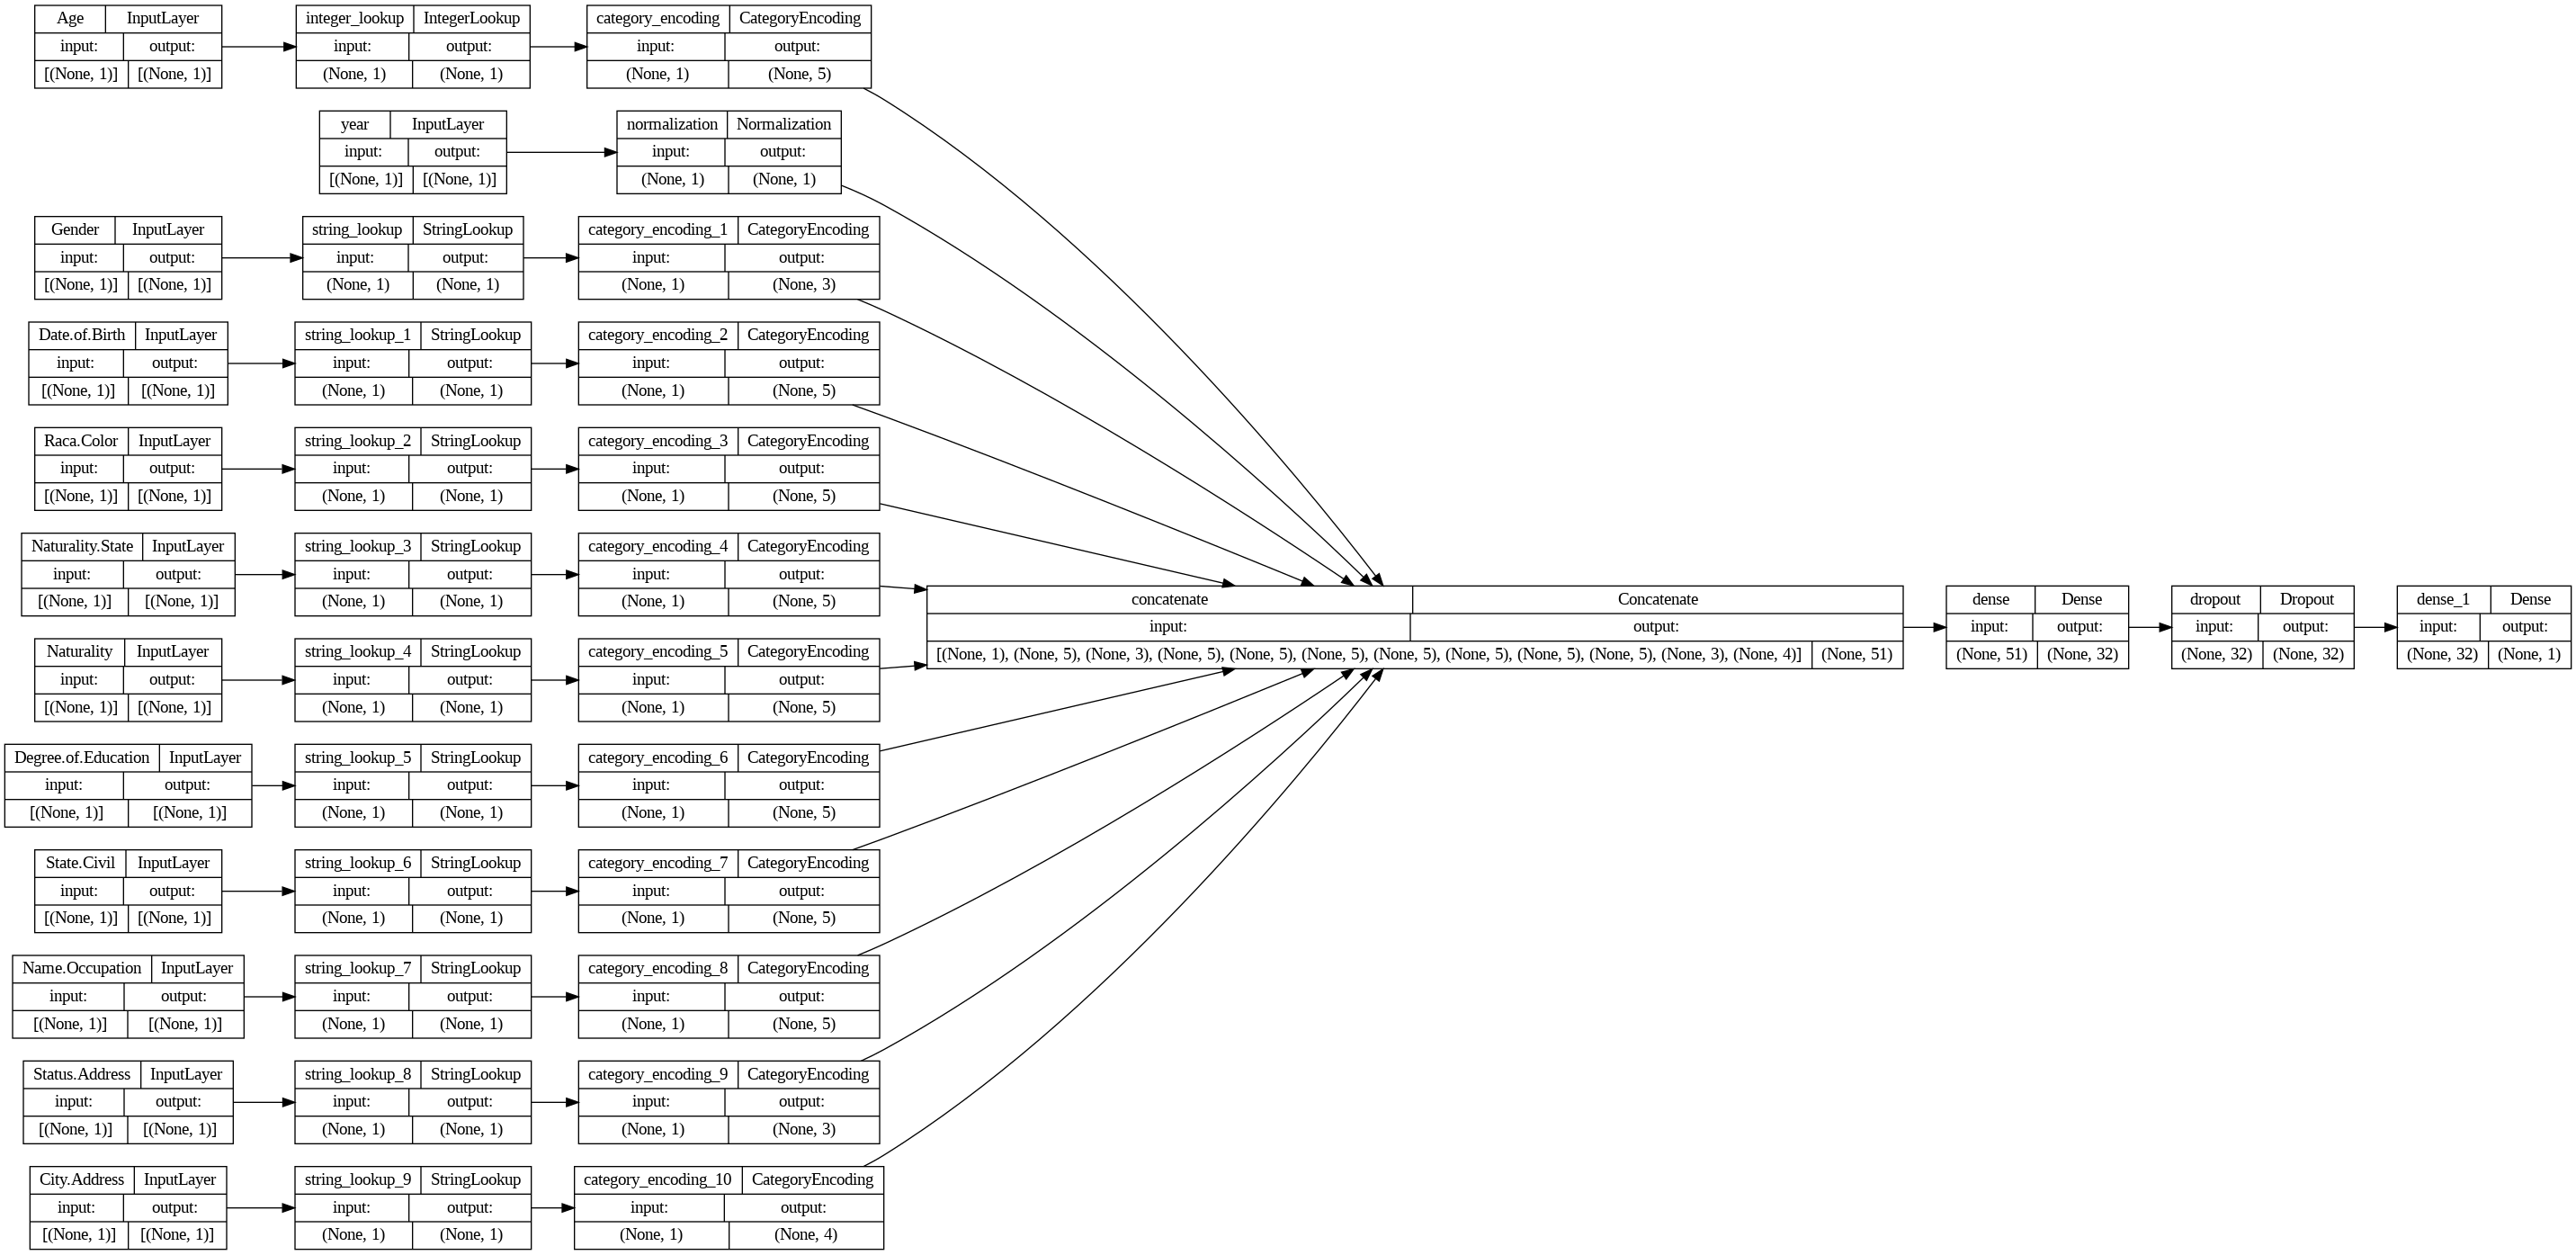

In [ ]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

O código abaixo treina o modelo usando os dados de treinamento train_ds por 10 épocas e também avalia o desempenho do modelo usando os dados de validação val_ds.

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


157/157 [==============================] - 5s 16ms/step - loss: 0.0957 - accuracy: 0.9904 - val_loss: 0.0521 - val_accuracy: 0.9912
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0499 - accuracy: 0.9926 - val_loss: 0.0530 - val_accuracy: 0.9912
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0486 - accuracy: 0.9926 - val_loss: 0.0524 - val_accuracy: 0.9912
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0494 - accuracy: 0.9926 - val_loss: 0.0515 - val_accuracy: 0.9912
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0491 - accuracy: 0.9926 - val_loss: 0.0511 - val_accuracy: 0.9912
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0475 - accuracy: 0.9927 - val_loss: 0.0512 - val_accuracy: 0.9912
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.0481 - accuracy: 0.9926 - val_loss: 0.0510 - val_accuracy: 0.9912
Epoch 8/10
157

O código abaixo calcula a perda e a precisão do modelo usando os dados de teste test_ds. A função evaluate é usada para avaliar o modelo em relação aos dados de teste e retorna a perda e as métricas definidas durante a compilação do modelo.

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

20/20 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9936
Accuracy 0.9936000108718872


Os códigos abaixo criam um DataFrame model_history a partir do histórico de treinamento do modelo. O histórico contém as métricas de treinamento e validação (no caso, precisão) calculadas a cada época durante o treinamento do modelo.

Em seguida, um gráfico de linhas é criado para visualizar a precisão de treinamento e validação ao longo das épocas. A precisão de treinamento é representada pela linha azul e a precisão de validação é representada pela linha laranja.

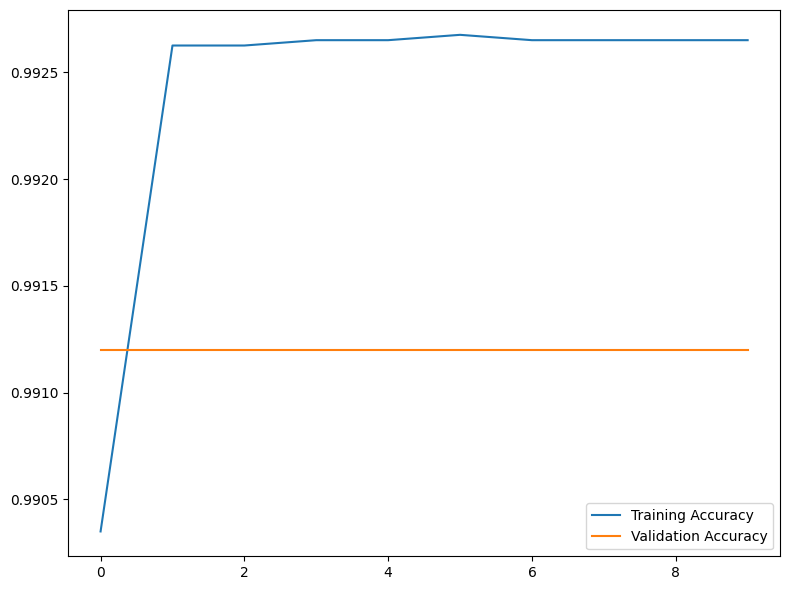

In [ ]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["accuracy"],
        label="Training Accuracy")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"],
        label="Validation Accuracy")
ax.legend()

plt.tight_layout()
plt.show()

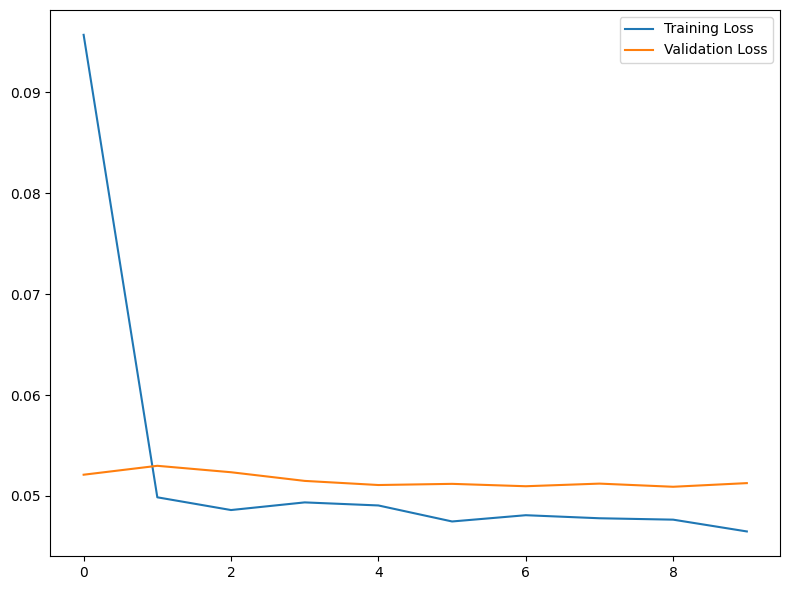

In [ ]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["loss"],
        label="Training Loss")
ax.plot(np.arange(0, num_epochs), model_history["val_loss"],
        label="Validation Loss")
ax.legend()

plt.tight_layout()
plt.show()